# EDA: 인지·행동 검사 A/B 데이터 탐색

- 파일 위치: `project/data/A.csv`, `project/data/B.csv` (없으면 `data/`, `*/train|test/`에서도 자동 탐색)
- 제외 컬럼: `Test_id`, `PrimaryKey`, `Test` (존재하는 경우)
- 제공 기능: 기본 정보, 결측치 요약, 범주형 상위 분포, 숫자 통계/히스토그램, 반응시간 패턴 분포


In [1]:
# 목적: 환경 설정 및 파일 탐색/로드 유틸 정의
# - ID_COLS: 분석에서 제외할 식별/메타 컬럼 목록
# - DATA_CANDIDATES: 데이터 자동 탐색 경로 우선순위
# - find_file: A.csv/B.csv를 위 경로에서 순차 탐색
# 출력: A, B 데이터프레임과 미리보기(HEAD)

import os, re
from typing import List, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11

ID_COLS = ['Test_id','PrimaryKey','Test']

PROJECT_ROOT = os.path.abspath(os.getcwd())
DATA_CANDIDATES = [
    os.path.join(PROJECT_ROOT, 'project', 'data'),
    os.path.join(PROJECT_ROOT, 'data'),
    PROJECT_ROOT,
]

def find_file(filename: str) -> Optional[str]:
    for base in DATA_CANDIDATES:
        p0 = os.path.join(base, filename)
        if os.path.isfile(p0):
            return p0
        for sub in ('train','test'):
            p1 = os.path.join(base, sub, filename)
            if os.path.isfile(p1):
                return p1
    return None

A_PATH = find_file('A.csv')
B_PATH = find_file('B.csv')
print('A.csv ->', A_PATH)
print('B.csv ->', B_PATH)
assert A_PATH is not None, 'A.csv 경로를 찾을 수 없습니다. project/data/ 에 파일을 넣어 주세요.'
assert B_PATH is not None, 'B.csv 경로를 찾을 수 없습니다. project/data/ 에 파일을 넣어 주세요.'

A = pd.read_csv(A_PATH)
B = pd.read_csv(B_PATH)
display(A.head(3))
display(B.head(3))

def drop_id_cols(df: pd.DataFrame) -> pd.DataFrame:
    cols = [c for c in ID_COLS if c in df.columns]
    return df.drop(columns=cols, errors='ignore')


A.csv -> /Users/yangjinmo/drivier-predction/project/data/A.csv
B.csv -> /Users/yangjinmo/drivier-predction/project/data/B.csv


,Test_id,Test,PrimaryKey,Age,TestDate,A1-1,A1-2,A1-3,A1-4,A2-1,...,A5-3,A6-1,A7-1,A8-1,A8-2,A9-1,A9-2,A9-3,A9-4,A9-5
0,0x744773A3B58E27F1811B47B53331F272AB5E569A9F72...,A,0x744773A3B58E27F1811B47B53331F272AB5E569A9F72...,20a,201811,"2,2,1,2,1,2,1,1,2,1,2,1,1,2,1,2,2,1","1,3,3,2,3,3,2,2,3,3,2,1,2,1,1,1,2,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","29,33,56,64,5,-51,44,-1,0,31,30,5,67,33,43,21,...","1,1,2,3,1,2,2,3,3,1,1,3,2,2,1,2,3,3",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",13,15,0,1,4,16,0,5,7
1,0xDA7DE599194F2B4F9624ACBCE96E66E2F8B357A4DD97...,A,0xDA7DE599194F2B4F9624ACBCE96E66E2F8B357A4DD97...,20a,201811,"2,2,1,2,2,1,1,1,2,2,1,2,1,1,2,1,2,1","3,2,2,1,1,3,1,1,2,3,2,1,3,1,2,3,3,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","76,1,27,25,41,34,-24,7,18,85,-18,-21,31,-7,18,...","2,3,3,1,2,2,3,2,3,1,2,3,1,3,2,1,1,1",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",11,11,9,0,1,3,0,0,4
2,0x7DF700D37380AD164ADF79B485C3A84A571186E3DB27...,A,0x7DF700D37380AD164ADF79B485C3A84A571186E3DB27...,20a,201802,"1,1,2,1,2,2,2,2,1,2,1,1,1,1,1,2,2,2","2,3,3,1,1,2,1,1,3,2,1,2,2,3,1,2,3,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-1,22,0,-37,-21,7,-34,-21,-79,-26,-80,-23,-63,...","1,1,3,2,3,2,1,1,1,1,3,2,2,2,2,3,3,3",...,"0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",12,16,2,2,2,5,0,4,4


,Test_id,Test,PrimaryKey,Age,TestDate,B1-1,B1-2,B1-3,B2-1,B2-2,...,B9-2,B9-3,B9-4,B9-5,B10-1,B10-2,B10-3,B10-4,B10-5,B10-6
0,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,B,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.03798499,0,0.5811322,0,0,0.5803714,1.00910...","3,1,4,1,3,4,1,1,3,1,4,1,1,1,3,4","1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1","0.8907053,0,0,0,0,1.040678,0.6199818,0,0,0.657...",...,0,0,35,1,20,0,3,57,7,15
1,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,B,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,60b,201602,"1,2,2,2,2,2,1,2,2,2,1,1,1,1,1,1","0,0,0,0.1280282,0,0,0.9760087,0.03197882,0,0.0...","4,4,3,1,4,2,1,1,4,1,4,1,3,3,1,1","1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",...,0,0,35,2,19,1,1,59,10,19
2,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,B,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,70a,201602,"1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1","0.5967258,0,0,0,0,0,0.7050578,0.6730202,0,0.83...","1,4,4,2,4,3,1,1,4,1,1,3,1,3,4,1","2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1","0,0.7690769,0,0,0.7381148,0,0,0.9290089,0,0,0....",...,0,0,35,0,18,2,0,60,5,19


## 1) 기본 정보 (shape, dtypes, 메모리) 및 Test 분포

In [2]:
# 목적: 데이터 기본 규모와 메모리 소비, dtypes, Test 분포 확인
# - mem_mb: deep=True로 실제 메모리 사용량 계산
# - show_basic_info: shape/memory/dtypes + Test 분포

def mem_mb(df: pd.DataFrame) -> float:
    return float(df.memory_usage(deep=True).sum() / (1024**2))

def show_basic_info(name: str, df: pd.DataFrame):
    print(f'[{name}] shape=', df.shape, '| memory(MB)=', round(mem_mb(df),2))
    display(df.dtypes.to_frame('dtype'))
    if 'Test' in df.columns:
        print(f'[{name}] Test 분포:')
        display(df['Test'].value_counts(dropna=False).to_frame('count'))

show_basic_info('A', A)
show_basic_info('B', B)


[A] shape= (647241, 37) | memory(MB)= 2339.92


,dtype
Test_id,object
Test,object
PrimaryKey,object
Age,object
TestDate,int64
A1-1,object
A1-2,object
A1-3,object
A1-4,object
A2-1,object


[A] Test 분포:


,count
Test,
A,647241


[B] shape= (297526, 31) | memory(MB)= 678.77


,dtype
Test_id,object
Test,object
PrimaryKey,object
Age,object
TestDate,int64
B1-1,object
B1-2,object
B1-3,object
B2-1,object
B2-2,object


[B] Test 분포:


,count
Test,
B,297526


## 2) 결측치 요약 (ID 컬럼 제외)

In [11]:
# 목적: 컬럼별 결측치 개수/비율 상위 확인 (ID 컬럼 제외)
# - missing_summary: 결측치가 있는 컬럼만 반환

def missing_summary(df: pd.DataFrame, topn: int = 30):
    df_n = drop_id_cols(df)
    na_cnt = df_n.isna().sum().sort_values(ascending=False)
    na_ratio = (na_cnt / len(df_n)).round(4)
    out = pd.DataFrame({'na_count': na_cnt, 'na_ratio': na_ratio})
    return out[out.na_count > 0].head(topn)

print('[A] missing:')
display(missing_summary(A))
print(len(missing_summary(A)))
print('[B] missing:')
display(missing_summary(B))


[A] missing:


,na_count,na_ratio
A5-1,2,0.0
A5-3,2,0.0
A5-2,2,0.0
A3-1,1,0.0
A3-7,1,0.0
A3-6,1,0.0
A3-5,1,0.0
A3-4,1,0.0
A3-3,1,0.0
A3-2,1,0.0


14
[B] missing:


,na_count,na_ratio
B1-1,9,0.0
B1-2,9,0.0
B1-3,9,0.0
B6,3,0.0
B3-2,3,0.0
B5-2,3,0.0
B5-1,3,0.0
B4-2,3,0.0
B4-1,3,0.0
B3-1,3,0.0


## 3) 범주형 분포 요약 (상위 값, ID 컬럼 제외)

In [5]:
# 목적: 범주형(또는 저유니크 정수) 컬럼의 상위 값 분포 확인
# - is_categorical_series: dtype/고유값비율로 범주형 추정
# - top_value_counts: 컬럼별 상위 N개 값/빈도 출력

def is_categorical_series(s: pd.Series, max_unique_ratio: float = 0.2) -> bool:
    if s.dtype.name in ('object','category','bool'):
        return True
    if pd.api.types.is_integer_dtype(s) or pd.api.types.is_bool_dtype(s):
        nunq = s.nunique(dropna=True)
        return nunq <= max(20, int(len(s) * max_unique_ratio))
    return False

def top_value_counts(df: pd.DataFrame, topn_cols: int = 20, topn_vals: int = 10):
    df_n = drop_id_cols(df)
    cat_cols = [c for c in df_n.columns if is_categorical_series(df_n[c])]
    print(f'categorical columns (<= {topn_cols} shown):', len(cat_cols))
    for c in cat_cols[:topn_cols]:
        vc = df_n[c].value_counts(dropna=False).head(topn_vals)
        print(f'\n[{c}] top-{topn_vals}')
        display(vc.to_frame('count'))

print('[A] categorical distributions')
top_value_counts(A)
print('[B] categorical distributions')
top_value_counts(B)


[A] categorical distributions
categorical columns (<= 20 shown): 34

[Age] top-10


,count
Age,
50a,98475
40b,95265
50b,91526
40a,81617
30b,71463
60a,70295
30a,47333
20b,41515
60b,21746



[TestDate] top-10


,count
TestDate,
201907,14164
201904,13698
201901,13355
201807,13293
202103,13007
201808,12928
202104,12767
201804,12751
201908,12676



[A1-1] top-10


,count
A1-1,
"2,2,1,2,1,1,2,2,2,1,1,1,1,2,2,2,1,1",60501
"2,2,2,1,1,2,2,2,1,1,1,1,1,2,2,1,2,1",13497
"1,1,1,2,2,1,2,1,2,1,1,2,2,2,2,1,2,1",38
"1,2,1,2,1,1,2,2,2,2,1,1,2,1,1,1,2,2",37
"2,2,2,1,1,2,2,1,1,1,1,2,2,1,1,1,2,2",37
"1,2,2,2,1,2,2,1,2,1,1,2,2,2,1,1,1,1",37
"2,2,1,2,1,1,1,2,1,2,2,1,1,2,2,1,2,1",36
"2,1,2,1,1,1,1,2,1,2,1,2,2,2,2,2,1,1",36
"2,1,2,2,1,1,1,1,2,1,1,1,2,2,2,2,1,2",36



[A1-2] top-10


,count
A1-2,
"3,1,2,2,1,1,1,3,2,3,3,1,2,2,1,3,2,3",60496
"3,2,1,3,2,1,3,3,3,1,3,1,2,2,1,2,2,1",13488
"3,1,3,3,3,2,1,1,2,2,1,3,2,1,2,3,1,2",11
"1,1,3,1,2,3,3,1,3,2,2,1,3,1,2,2,2,3",10
"1,1,2,2,3,1,2,3,3,2,2,2,3,1,3,1,3,1",10
"2,3,1,1,1,2,3,2,3,3,1,2,2,3,1,2,1,3",9
"1,3,3,2,2,1,1,2,3,3,2,3,1,2,1,3,2,1",9
"3,3,2,3,1,1,1,3,3,2,1,1,2,2,3,2,2,1",9
"2,1,1,2,3,2,3,1,2,3,2,1,3,2,1,1,3,3",9



[A1-3] top-10


,count
A1-3,
"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",581100
"0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",5822
"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2839
"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2681
"0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2091
"0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0",1935
"0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0",1867
"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1",1829
"0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0",1824



[A1-4] top-10


,count
A1-4,
"16,-47,-23,-60,-50,-49,-72,-51,-60,-20,-80,-11,-46,-55,-34,-25,-46,-45",60492
"42,81,55,48,84,-8,25,0,22,-11,48,14,50,24,3,-6,47,56",13487
"-9,-25,-38,-47,0,-46,-12,-72,-9,-28,-26,-37,-9,-28,-28,1,73,27",2
"29,33,56,64,5,-51,44,-1,0,31,30,5,67,33,43,21,13,18",1
"-37,-34,-179,-115,-55,-79,-6,-290,-54,21,-54,21,44,-38,-79,-51,-50,64",1
"125,597,594,721,639,635,638,594,725,76,-34,597,639,725,635,636,722,594",1
"-188,-257,-336,-220,-245,-361,-199,-350,-324,-212,-242,-235,-218,-293,-294,-276,-490,-260",1
"-26,-38,-80,-75,-40,-67,-179,-131,31,-3,-21,-38,-8,-79,-72,-76,110,184",1
"-18,-8,-24,-43,-6,-25,-63,-4,-51,4,-54,-37,-20,-60,-43,-51,-54,-7",1



[A2-1] top-10


,count
A2-1,
"2,3,3,2,2,1,2,1,3,3,1,3,1,1,3,1,2,2",60493
"2,1,1,1,1,1,1,2,3,2,3,3,3,2,2,3,2,3",12
"1,2,1,3,1,2,2,2,3,3,2,3,1,3,1,2,3,1",10
"1,2,3,2,3,1,2,3,3,3,2,1,2,1,1,2,1,3",10
"3,1,3,1,3,2,2,2,2,1,3,2,2,1,1,3,3,1",10
"2,1,3,3,3,1,2,3,2,1,1,2,2,2,3,1,3,1",9
"2,3,2,3,2,3,1,2,1,3,3,2,2,1,3,1,1,1",9
"1,2,1,2,1,3,2,2,1,1,2,3,3,3,2,3,1,3",9
"2,3,1,1,3,3,1,1,2,1,2,1,2,2,3,3,2,3",9



[A2-2] top-10


,count
A2-2,
"1,1,3,2,2,1,1,2,2,2,2,3,3,3,1,1,3,3",60493
"1,2,3,1,1,2,3,1,3,3,1,3,2,3,2,1,2,2",12
"2,1,1,1,2,3,1,2,2,2,1,3,1,2,3,3,3,3",10
"1,1,1,2,3,1,2,1,2,2,2,3,3,3,3,2,1,3",10
"2,1,2,1,3,2,3,3,1,1,2,3,2,1,1,3,2,3",10
"2,1,2,1,3,2,1,2,3,1,1,3,3,3,2,2,3,1",9
"3,3,1,2,1,2,1,3,2,1,1,2,1,3,2,2,3,3",9
"2,1,3,3,2,1,1,1,1,3,2,2,3,3,1,2,3,2",9
"2,2,1,3,3,2,2,2,1,1,2,1,3,1,3,3,1,3",9



[A2-3] top-10


,count
A2-3,
"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",581694
"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",3778
"0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0",3619
"0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0",3495
"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",3220
"0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0",3210
"0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0",3086
"0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2899
"0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0",2830



[A2-4] top-10


,count
A2-4,
"-80,-107,-111,-94,-74,-68,-33,-120,-74,-95,-45,-46,-75,-92,-107,-86,-69,-69",60492
"-60,-2,-20,-14,-68,-2,-75,30,-31,-42,-35,-23,16,-69,-27,58,-120,-29",12
"999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999",10
"4,29,34,-97,22,-37,14,-98,1,-27,-14,-28,-49,10,1,-2,15,-12",2
"-113,-95,13,-103,-80,30,-39,-8,-94,47,-57,-128,-20,-46,-29,22,65,-345",1
"10,4,31,-27,-5,-89,0,30,-27,-28,16,0,-60,-74,-24,-21,-26,-20",1
"-28,8,-31,-23,-86,-32,-186,-60,-48,40,-148,-195,-98,-126,-13,-8,-32,-20",1
"22,-7,-45,-48,16,-19,31,-29,-2,10,35,18,-53,-68,-20,42,-39,-33",1
"-155,-6,-47,-7,-109,-95,-60,-63,-119,0,-163,-63,-68,-92,0,-119,-23,-86",1



[A3-1] top-10


,count
A3-1,
"1,2,1,1,2,2,1,2,2,2,2,1,1,1,1,2,1,2,1,1,1,1,2,2,2,2,2,1,2,1,1,2",60494
"2,1,2,1,1,2,1,2,1,1,2,2,2,2,2,1,1,1,1,2,1,2,2,1,1,1,1,2,2,2,1,2",12
"1,1,2,1,2,1,2,2,2,2,1,2,1,2,2,1,2,1,1,2,1,1,1,1,1,2,2,2,2,1,2,1",10
"2,1,2,1,1,2,2,2,2,1,1,2,1,2,2,2,2,1,2,2,1,1,1,1,1,1,2,2,1,1,2,1",10
"2,1,2,2,1,1,1,2,1,2,2,1,1,2,2,1,1,2,2,2,1,2,1,1,1,2,2,1,1,2,1,2",10
"2,2,2,2,2,2,1,1,1,2,1,2,2,2,2,1,1,1,2,1,1,2,1,1,1,2,2,1,1,1,2,1",9
"1,2,2,1,1,2,1,1,2,2,1,2,2,1,1,2,2,1,2,2,1,1,2,1,2,1,2,2,1,2,1,1",9
"2,2,1,1,1,1,2,2,2,1,2,2,1,2,2,1,1,1,1,2,2,1,1,2,1,2,1,2,1,1,2,2",9
"2,2,2,2,1,2,1,1,2,2,2,2,1,1,2,2,2,1,1,1,2,1,1,1,1,1,2,1,1,2,2,1",9



[A3-2] top-10


,count
A3-2,
"4,7,2,6,7,7,8,5,1,5,3,8,8,4,2,5,6,3,6,2,4,2,5,1,1,1,3,6,3,4,8,7",60494
"7,8,1,4,6,3,2,7,2,8,5,5,1,1,3,6,8,2,6,3,4,5,7,8,4,2,4,5,3,7,6,1",12
"1,8,5,4,2,3,3,7,5,4,2,3,4,7,7,3,5,8,1,1,6,2,6,8,6,6,7,5,2,8,1,4",10
"6,2,3,6,3,8,5,3,7,1,8,5,6,3,5,2,1,4,8,7,6,4,2,4,2,1,5,7,7,8,1,4",10
"1,4,1,3,2,8,2,7,4,5,3,6,4,5,5,6,8,7,1,3,8,1,6,2,2,3,5,8,6,7,4,7",10
"8,2,5,6,6,8,7,5,2,4,5,2,7,3,7,2,8,5,3,4,4,1,6,3,6,1,8,7,4,3,1,1",9
"7,1,3,5,3,1,4,8,6,5,2,7,7,3,1,4,8,8,7,2,2,3,6,8,4,1,5,2,4,6,5,6",9
"5,1,2,6,2,8,7,1,3,2,5,3,8,1,3,8,8,6,4,7,7,4,4,1,6,7,6,5,4,2,5,3",9
"1,1,7,8,6,8,8,7,5,4,2,6,6,4,2,2,5,2,3,7,7,6,4,8,3,3,1,3,4,1,5,5",9



[A3-3] top-10


,count
A3-3,
"1,2,2,1,2,1,1,2,1,1,2,2,2,2,1,1,2,1,1,2,1,1,2,2,1,2,1,2,2,2,1,1",60494
"1,1,1,2,1,2,1,2,1,2,2,1,2,1,1,1,2,2,2,2,1,2,1,1,2,2,1,1,1,2,2,2",12
"2,2,1,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,1,1,2,2,1,1,2,2,1,1,1,1,2,2",10
"2,1,2,1,2,1,1,1,1,2,1,2,1,2,1,2,2,2,1,1,1,1,2,1,2,1,2,1,2,2,2,2",10
"2,2,1,1,2,2,2,2,2,2,2,1,2,1,2,2,2,2,1,1,1,2,1,1,1,1,1,2,1,1,1,1",10
"2,2,1,2,2,1,1,1,2,1,2,1,1,2,2,1,2,2,1,2,2,2,1,1,1,1,1,2,1,2,2,1",9
"1,1,1,1,1,2,2,2,1,1,2,2,2,1,2,1,2,2,2,2,1,2,1,1,1,1,2,2,1,2,2,1",9
"2,2,2,1,2,2,2,1,1,1,2,1,1,2,2,1,2,1,1,1,2,2,1,1,1,2,1,2,2,1,1,2",9
"1,1,1,2,2,2,1,1,2,1,1,2,1,2,1,2,1,2,2,1,2,1,2,1,2,2,2,1,2,1,1,2",9



[A3-4] top-10


,count
A3-4,
"4,7,2,6,5,7,8,5,1,5,3,7,2,4,2,5,6,3,6,4,4,3,5,2,4,1,3,6,3,4,1,7",60492
"7,2,1,2,6,3,2,7,2,8,5,1,1,1,6,2,8,2,7,3,3,5,7,8,4,2,4,5,4,7,6,1",12
"5,1,8,8,7,1,6,2,5,4,7,2,2,1,3,6,5,2,8,4,1,3,7,4,4,6,5,5,5,7,8,3",2
"6,6,6,1,5,7,2,3,1,4,1,6,7,3,8,3,3,6,3,5,2,7,5,4,2,5,2,8,1,8,2,8",2
"4,5,3,7,3,7,1,3,7,2,4,6,2,5,5,1,8,3,3,4,6,6,7,4,3,4,8,5,2,1,1,8",1
"5,8,6,8,4,3,8,2,2,6,7,7,7,2,2,5,6,4,7,7,4,1,5,3,6,5,1,5,5,7,1,4",1
"3,6,1,7,3,1,8,1,6,5,8,5,1,4,7,2,5,1,3,5,7,7,8,5,2,3,4,4,4,4,2,7",1
"6,4,6,1,1,1,1,5,3,2,8,3,2,5,8,2,3,7,4,8,7,4,2,3,1,4,2,7,6,3,1,7",1
"2,2,6,4,1,1,3,7,4,3,8,8,5,6,7,2,8,5,6,7,3,8,6,4,4,1,3,2,1,1,7,3",1



[A3-5] top-10


,count
A3-5,
"1,1,1,1,3,1,1,1,1,1,1,3,3,1,1,1,1,1,1,3,1,3,1,3,3,1,1,1,1,1,3,1",60494
"1,3,1,3,1,1,1,1,1,1,1,3,1,1,3,3,1,1,3,1,3,1,1,1,1,1,1,1,3,1,1,1",12
"3,1,1,1,1,3,1,1,1,1,1,3,1,1,3,3,1,1,3,1,1,1,1,3,3,1,1,1,1,1,1,1",9
"1,3,1,3,1,3,1,1,1,1,1,1,3,1,1,3,3,1,1,1,3,1,1,1,1,1,1,1,1,1,1,3",8
"1,3,1,1,3,1,1,1,1,3,3,1,1,1,1,1,1,1,1,1,3,3,1,1,1,1,1,1,3,1,1,3",8
"1,1,1,1,1,1,1,3,1,1,3,1,3,1,1,1,1,1,1,1,3,1,1,1,3,3,1,1,1,3,1,3",8
"3,1,1,1,1,1,1,1,3,1,1,1,3,1,3,1,3,3,1,3,1,1,1,1,1,1,1,1,3,1,1,1",7
"3,1,1,1,1,1,1,1,3,1,3,3,1,1,3,1,1,1,1,1,1,1,1,3,1,1,1,1,3,1,1,3",7
"1,1,3,3,1,1,1,3,3,1,1,3,1,3,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,3,1,1",7



[A3-6] top-10


,count
A3-6,
"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",543156
"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",3828
"0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",3300
"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2769
"0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2759
"0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2602
"0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2526
"0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2382
"0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2277



[A3-7] top-10


,count
A3-7,
"634,700,750,1167,1368,750,701,634,801,650,700,1151,1018,850,784,601,700,550,700,1167,634,967,650,951,1367,800,801,750,901,634,750,650",60492
"1368,783,750,1167,1417,700,800,950,950,1635,1568,1000,700,601,850,1251,950,900,1217,1100,1067,1050,1117,1201,867,733,1167,950,650,650,600,533",12
"1201,2035,800,951,1317,1351,950,1418,900,2502,1251,1935,900,734,800,1668,1618,1517,1167,1918,850,800,684,1368,1368,634,950,650,950,683,967,783",2
"867,550,483,1233,900,550,1267,750,800,550,550,500,483,550,550,434,500,450,483,500,450,750,500,950,550,500,483,550,433,500,500,483",1
"1784,800,700,1101,851,1317,701,817,634,968,550,634,633,700,700,1301,968,851,850,650,700,700,2502,1250,550,900,750,750,650,1468,800,851",1
"1717,1218,1268,1151,917,1217,1251,1368,1167,951,950,1166,750,1268,1217,1417,951,1117,951,1068,1250,901,1017,750,1067,1150,1167,800,1000,1167,1117,1300",1
"917,1000,650,851,1050,700,700,1818,750,1568,1101,750,700,1351,750,650,1000,701,1517,950,851,1467,701,683,600,701,633,1935,951,900,967,800",1
"1434,1985,1417,750,651,1333,801,800,750,817,800,650,1618,701,650,617,651,700,651,583,1417,1434,750,600,1167,650,534,550,700,1634,900,550",1
"733,1267,1101,851,650,1101,850,650,1051,633,700,650,684,750,650,650,633,1000,700,634,700,734,701,750,650,634,967,1151,750,851,1101,750",1



[A4-1] top-10


,count
A4-1,
"2,2,1,1,2,2,1,1,2,1,1,1,1,1,1,2,2,2,1,2,2,2,1,1,1,1,1,2,2,2,2,1,1,1,1,1,2,2,1,2,2,1,1,2,2,2,1,2,1,2,2,1,2,1,1,2,2,1,1,1,1,2,2,1,2,1,2,2,1,2,2,1,1,2,1,2,2,2,1,2",60494
"1,2,2,2,2,1,1,2,2,2,2,1,1,1,2,2,1,1,1,2,2,2,1,1,2,1,1,1,1,1,1,2,1,1,2,2,1,2,1,1,1,1,1,2,1,1,1,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2,1,2,1,2,2,1,1,2,1,1,2,2,2,2,1,2,1",12
"1,2,1,1,1,1,1,2,2,2,2,2,1,1,1,2,1,2,1,2,2,2,2,1,1,1,1,1,2,1,2,1,2,2,2,1,2,1,1,2,1,2,1,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,1,2,1,1,2,2,2,1,1,2,2",9
"2,1,1,1,1,2,1,2,1,1,2,2,2,1,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2,2,1,1,1,1,1,2,1,2,2,1,2,2,1,1,2,2,1,1,1,2,2,1,1,1,2,1,1,1,2,2,2,2,1,2,1,1,2,2,1,1,2,1,1,1,1,2,2,2,2",9
"1,1,2,1,1,1,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,2,2,1,1,1,2,2,2,2,2,1,1,1,1,1,2,1,1,2,2,2,2,2,2,2,1,1,2,1,1,1,2,2,2,1,1,2,2,2,2,2,2,2,2,1,1,2,2,1,1,1,2,1,2,1,2,1,2,2",9
"2,1,1,1,2,1,2,2,1,2,2,2,2,1,2,2,1,1,2,1,2,1,1,1,2,2,2,2,1,2,2,2,1,2,2,1,1,1,1,1,2,1,2,2,1,2,2,2,1,2,1,1,1,2,2,1,2,1,2,1,1,1,1,2,2,1,1,1,2,1,1,1,2,2,2,2,1,2,1,1",8
"1,2,2,1,1,1,2,2,2,1,2,2,1,1,2,1,1,1,2,2,1,1,2,2,2,1,1,2,2,1,2,2,2,2,2,2,1,1,2,1,1,2,2,1,2,1,1,1,1,1,1,2,2,1,2,1,1,2,1,2,2,1,1,2,2,1,1,2,2,1,2,2,1,1,2,1,1,1,2,2",8
"2,1,1,1,1,1,2,1,2,2,2,1,1,1,2,2,1,2,2,2,1,2,2,2,1,1,1,2,2,1,1,2,2,1,1,2,1,1,2,1,2,1,2,1,2,2,2,1,1,2,2,1,1,2,2,2,2,2,1,1,2,1,2,1,1,2,1,1,1,2,1,2,2,2,1,2,2,1,1,1",8
"2,2,2,2,2,1,1,1,1,2,2,1,2,1,2,2,2,1,1,2,2,1,1,1,1,2,1,2,1,2,1,2,1,1,1,2,2,1,1,2,1,2,2,2,1,1,1,1,1,1,1,2,1,1,1,2,2,2,1,1,1,1,1,2,2,2,1,2,2,2,2,2,2,2,1,2,1,1,2,2",8



[A4-2] top-10


,count
A4-2,
"2,1,1,1,1,2,1,2,1,2,1,2,2,1,1,1,1,2,2,2,1,1,1,1,1,2,2,1,2,2,2,1,1,2,2,1,1,2,1,1,1,2,2,2,2,2,2,1,2,1,1,1,2,2,1,1,1,2,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,1,2,2,1,1,1",60494
"1,1,2,1,2,2,2,2,1,1,1,1,1,2,2,1,2,2,1,2,1,1,1,2,2,2,1,2,1,2,1,2,1,1,2,2,2,1,2,2,1,1,1,2,2,1,1,2,2,2,1,1,1,2,1,1,2,2,2,2,2,1,2,2,1,2,1,1,2,2,1,1,1,1,2,2,1,2,1,1",12
"1,1,1,2,2,1,2,2,2,2,2,2,1,2,1,1,1,1,2,1,1,1,2,1,2,1,2,2,1,2,1,1,2,1,2,2,1,1,1,2,2,2,1,1,1,2,1,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,1,2,1,1,1,2,1,1,1,1,1,1,1,1,2,2,2,2",9
"1,2,1,1,2,2,1,1,2,1,1,1,1,2,2,2,2,2,2,1,1,1,2,2,2,1,1,1,2,2,2,1,2,1,2,1,2,1,2,1,1,2,2,1,2,1,2,1,2,2,1,2,2,2,2,2,2,1,1,1,1,2,2,2,2,1,1,1,2,1,1,1,1,1,2,2,1,1,1,2",9
"1,2,2,2,2,1,2,2,1,2,2,1,2,2,1,1,2,2,1,2,1,1,2,1,2,1,1,2,1,2,2,2,2,2,1,1,2,1,2,2,1,1,2,2,1,2,2,1,2,1,1,2,2,1,1,2,1,1,2,2,1,1,1,1,2,1,1,1,1,1,2,1,1,2,2,2,1,1,2,1",9
"1,1,2,2,2,2,2,1,2,1,2,2,1,2,2,2,1,2,2,2,2,1,2,1,1,2,1,2,2,2,2,2,1,2,1,1,2,2,1,2,2,2,2,1,2,1,2,2,2,1,1,1,1,1,1,1,2,1,1,2,1,2,1,1,1,2,1,1,1,2,1,1,1,1,1,2,2,1,1,1",8
"1,1,2,2,2,1,2,1,2,2,1,2,2,2,2,1,2,1,1,1,2,2,2,2,1,2,1,1,2,1,1,2,2,1,2,2,2,1,1,1,2,1,1,1,2,2,2,2,1,2,2,1,2,1,1,2,1,1,1,1,2,2,1,1,1,1,1,2,2,1,2,1,1,1,2,2,1,2,2,1",8
"1,1,2,2,2,1,1,2,1,1,2,2,1,1,2,2,1,2,1,1,1,1,1,2,1,2,1,2,2,1,1,2,2,2,1,2,2,2,1,1,1,1,2,2,1,1,2,2,2,2,1,2,2,1,1,2,1,1,2,2,2,2,2,2,2,1,1,1,1,2,1,2,2,2,1,1,1,1,1,2",8
"1,2,2,2,1,2,1,2,2,2,1,1,1,1,2,2,1,2,1,1,2,2,2,2,2,1,2,1,1,2,2,1,2,1,2,1,2,2,2,1,1,1,2,1,2,1,2,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,1,2,2,1,2,1,2,2,2,2,1,1,1,2,1,2,2,2",8



[A4-3] top-10


,count
A4-3,
"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",286482
"1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",3927
"1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",3857
"1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",3815
"1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",3795
"1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",3734
"1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",3680
"1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",3673
"1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",3614


[B] categorical distributions
categorical columns (<= 20 shown): 28

[Age] top-10


,count
Age,
60b,163331
70a,109115
70b,22612
80a,2398
80b,70



[TestDate] top-10


,count
TestDate,
202001,16675
202002,11950
202011,10331
201912,9640
202007,8608
202012,8477
202204,8058
202103,8018
202205,7893



[B1-1] top-10


,count
B1-1,
"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",149726
"2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",8500
"1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1",5844
"1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1",5527
"1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1",5494
"1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1",5430
"1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1",5332
"1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1",5192
"1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1",5123



[B1-2] top-10


,count
B1-2,
"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",89427
NaN,9
"1.234684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",3
"0.8116824,0,0,0,0,0,0,0.699016,0,0.703186,0.7530748,0,0,0,0,0",3
"0,0,0,0,0.006363425,0,0.005836669,0,0.004525872,0.007421109,0,0,0.006911676,0.005804268,0.007654332,0",3
"1.034235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",3
"0,0,0,0,0,0,1.284556,0,0,0,0,0,0,0,0,0",2
"0.9007559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2
"1.190587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2



[B1-3] top-10


,count
B1-3,
"4,4,4,2,4,2,2,2,4,2,4,2,4,4,2,2",16794
"2,4,4,2,4,4,2,2,4,2,2,4,2,4,4,2",16354
"4,4,2,4,2,4,2,4,2,2,4,2,4,4,2,2",16333
"4,2,4,2,4,4,2,2,4,2,4,2,2,2,4,4",16043
"2,4,4,4,2,4,2,4,2,2,4,4,2,2,2,4",15777
"4,1,4,1,4,4,1,1,4,1,4,1,1,1,4,4",13843
"4,4,1,4,1,4,1,4,1,1,4,1,4,4,1,1",13837
"1,4,4,1,4,4,1,1,4,1,1,4,1,4,4,1",13092
"1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4",13080



[B2-1] top-10


,count
B2-1,
"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",80347
"2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",8444
"1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1",7866
"1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1",7341
"1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1",6723
"1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1",6409
"1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1",5593
"1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1",5562
"1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1",3266



[B2-2] top-10


,count
B2-2,
"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",101473
NaN,3
"1.084416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",3
"0.8067459,0,0,0.8496157,0,0,0,0,0.6921743,0,0,0,0,0,0,0",3
"0,1.167817,0,0,0,0,0,0,0,0,0,0,0,0,0,0",3
"1.034164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",3
"0,0,0.006478272,0,0.006095235,0,0,0.003975056,0,0.006422453,0,0,0.005764809,0.0054408,0,0",3
"1.034247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2
"0.6674542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",2



[B2-3] top-10


,count
B2-3,
"4,2,2,4,2,4,4,2,4,4,2,2,2,4,2,4",19941
"4,2,4,2,4,4,4,4,2,2,2,4,2,2,2,4",19536
"2,4,2,4,2,4,4,2,4,2,2,4,2,2,4,4",19221
"2,4,4,4,4,2,2,4,4,2,4,2,2,4,2,2",19130
"2,4,4,2,4,2,4,2,2,4,4,4,2,4,2,2",18904
"4,1,4,1,4,4,4,4,1,1,1,4,1,1,1,4",14311
"1,4,4,1,4,1,4,1,1,4,4,4,1,4,1,1",13987
"1,4,1,4,1,4,4,1,4,1,1,4,1,1,4,4",13557
"1,4,4,4,4,1,1,4,4,1,4,1,1,4,1,1",13238



[B3-1] top-10


,count
B3-1,
"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",283811
"2,1,1,1,1,1,1,1,1,1,1,1,1,1,1",693
"1,1,2,1,2,1,2,1,1,1,2,1,2,1,1",619
"1,1,2,1,1,2,1,2,1,2,1,1,1,2,1",595
"1,1,2,2,1,1,1,1,2,2,1,1,2,1,1",559
"1,1,1,1,1,1,1,1,1,1,1,1,2,1,1",525
"1,1,2,1,1,1,1,1,1,1,1,1,1,1,1",514
"1,1,1,1,2,2,1,1,2,2,1,1,1,2,1",508
"1,1,1,1,1,1,1,1,1,1,1,1,1,2,1",483



[B3-2] top-10


,count
B3-2,
"10,10,10,10,10,10,10,10,10,10,10,10,10,10,10",232
"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",4
"0.6286246,0.6625788,0.5576603,0.6278939,0.8407766,0.7633634,0.5969281,0.584057,0.6010302,0.7063813,0.6912968,0.8041867,0.594743,0.6101958,0.629158",3
"1.442078,0.5423229,0.5910239,0.5739187,0.5829938,0.5722418,0.6457728,0.6994085,1.023732,0.5260085,0.6595204,0.9294521,0.4590408,0.7721793,0.8457538",3
NaN,3
"0.6072472,0.6111953,0.6062142,0.5505066,0.5709642,0.6440283,0.6997358,0.5270196,0.5064365,0.5939606,0.5560341,0.5043413,0.550775,0.7755145,0.5791742",3
"0.7372747,0.8780242,0.7964879,0.7685162,0.7983338,0.6433656,0.8611498,0.820676,1.411578,0.7919324,0.8293735,0.7052321,0.797217,0.6753781,0.7363213",3
"0.7440796,1.012163,0.9916227,0.8338272,0.7330735,0.7396898,0.7346811,0.9954334,0.6742041,0.8244442,0.8512812,0.780156,0.6529706,1.026991,0.6916382",2
"0.8281875,0.6774353,0.7249891,0.6452503,0.7387868,0.6668202,0.7420323,0.6495751,0.7053816,0.6444113,0.6800311,0.6501821,0.826202,0.7109274,0.7003579",2



[B4-1] top-10


,count
B4-1,
"1,1,1,1,5,3,3,1,5,5,1,3,1,1,1,6,1,3,3,5,1,1,3,3,6,1,1,1,3,5,3,5,1,1,5,5,1,1,3,1,3,5,5,1,5,5,1,1,1,5,1,1,1,3,3,3,1,3,1,1",3
NaN,3
"1,3,5,1,1,4,3,1,1,5,5,3,5,3,1,3,1,3,1,3,5,1,1,3,5,3,5,5,1,1,5,5,3,3,1,1,1,1,1,1,1,6,1,1,1,3,5,1,5,1,1,3,1,1,1,6,1,1,5,3",3
"1,5,3,5,1,1,1,1,5,5,5,1,1,1,1,1,1,5,3,3,1,5,5,3,1,1,6,5,1,1,1,5,1,3,3,5,1,1,5,1,3,3,1,3,1,1,1,1,3,1,5,1,1,5,3,3,3,3,1,3",3
"1,5,1,1,1,3,1,5,3,3,3,3,5,3,1,3,1,5,1,5,1,1,5,1,5,3,1,3,1,1,3,5,1,1,5,5,1,1,1,1,3,5,1,5,1,3,3,1,3,1,3,1,5,5,1,1,1,5,1,1",3
"1,3,4,3,1,1,1,3,5,1,1,1,4,1,3,3,1,5,5,5,1,3,1,1,1,5,5,3,3,1,1,1,5,5,5,1,1,1,1,1,3,5,3,5,1,1,5,1,1,1,3,1,5,1,5,1,6,1,3,3",3
"1,1,3,1,5,1,5,5,3,1,1,5,1,5,5,3,1,1,5,3,1,1,3,1,3,5,1,3,1,5,5,1,1,5,3,3,3,3,3,1,3,1,1,1,1,1,5,1,1,1,5,1,5,1,1,5,3,1,3,1",3
"3,3,3,5,1,5,5,5,3,1,3,1,1,1,1,5,5,3,3,1,5,1,3,1,3,5,3,1,5,1,1,5,5,3,1,1,1,5,1,3,1,1,1,5,1,1,3,1,1,1,1,1,3,1,3,5,1,1,1,5",2
"1,3,5,5,3,3,5,1,1,5,5,1,5,1,1,1,3,1,1,3,1,1,3,1,1,5,1,1,5,3,1,1,3,3,3,5,1,3,1,3,1,5,3,1,1,1,5,3,1,5,1,1,3,1,1,1,5,5,1,5",2



[B4-2] top-10


,count
B4-2,
"1.15,1.05,1.05,0.87,1.34,1.05,0.95,0.95,1.16,0.87,0.84,0.76,0.95,0.84,0.84,0.77,0.63,0.87,0.95,0.84,0.76,0.95,0.74,0.76,0.84,0.84,0.63,0.87,1.05,0.66,0.74,1.16,1.08,1.06,0.76,0.75,1.26,0.86,0.96,1.06,0.86,0.78,0.94,0.74,0.87,0.76,0.86,0.96,0.78,0.73,0.86,0.98,0.73,0.86,0.86,0.87,0.76,0.84,0.88,0.86",3
"0.76,0.57,0.51,0.46,0.58,0.57,0.62,0.68,0.68,0.51,0.52,0.47,0.52,0.77,0.57,0.52,0.83,0.83,0.62,0.73,0.98,0.62,0.62,0.57,0.62,0.83,0.62,0.67,0.68,0.62,0.67,0.67,0.62,0.67,0.52,0.57,0.57,0.52,0.57,0.46,0.68,0.52,0.52,0.57,0.63,0.57,0.63,0.67,0.52,0.62,0.68,0.61,0.62,0.62,0.62,0.57,0.51,0.47,0.77,0.57",3
"0.66,0.77,0.72,0.47,0.57,0.52,0.82,0.72,0.51,0.78,0.61,0.63,0.62,0.62,0.78,0.67,0.67,0.67,0.57,0.67,0.77,0.56,0.62,0.62,0.62,0.57,0.72,0.72,0.57,0.56,0.68,0.62,0.62,0.52,0.57,0.51,0.51,0.51,0.47,0.51,0.47,0.57,0.56,0.63,0.56,0.72,0.62,0.52,0.62,0.56,0.62,0.77,0.73,0.67,0.52,0.52,0.61,0.62,0.94,0.67",3
"0.67,0.88,0.94,0.73,0.93,1.34,0.73,0.77,0.78,0.77,0.67,0.73,0.72,0.72,0.62,0.99,1.29,1.04,0.83,0.82,0.74,0.87,0.83,0.83,0.77,0.93,0.94,0.77,0.98,0.83,0.88,0.83,0.98,0.77,0.88,0.83,0.83,0.77,0.83,0.77,0.83,0.82,0.78,0.78,0.88,0.77,0.77,0.83,0.78,0.82,0.78,0.77,0.83,0.87,0.83,0.77,0.77,0.83,0.77,0.83",3
NaN,3
"0.65,0.73,0.62,1.09,0.72,1.14,0.72,0.67,0.99,0.67,0.82,0.62,0.83,0.67,0.88,0.88,0.62,0.68,0.82,0.67,0.93,0.72,0.67,0.88,0.72,0.67,0.72,0.78,0.57,0.67,0.83,0.93,0.87,0.93,0.57,0.87,0.63,0.57,0.57,0.62,0.82,0.62,0.87,0.78,0.62,0.98,0.57,0.83,0.62,0.83,0.83,0.62,0.73,0.52,0.67,0.94,0.72,0.62,0.62,0.77",2
"0.73,0.62,0.51,0.72,0.62,1.04,0.68,0.77,0.68,0.93,0.83,0.78,0.83,0.78,0.73,0.68,0.62,0.57,0.62,0.62,0.94,0.72,0.68,0.77,0.73,0.56,1.09,0.78,0.77,1.35,0.68,1.09,0.67,0.78,0.57,0.68,0.73,0.83,0.67,1.40,0.83,0.67,0.78,0.62,0.62,0.72,0.68,0.62,1.04,0.78,0.67,0.83,2.02,1.50,0.73,0.68,0.68,0.77,0.83,0.78",2
"0.83,0.83,0.72,0.73,0.57,0.67,0.82,0.67,0.78,0.67,0.67,0.83,0.88,0.77,0.94,0.72,0.82,0.78,0.82,0.83,0.68,0.93,0.78,0.77,0.88,0.72,0.68,0.93,0.52,0.77,0.67,0.77,1.04,0.72,0.67,0.67,0.72,0.68,0.67,0.62,0.72,0.87,0.83,0.67,0.82,0.88,0.88,0.77,0.62,0.82,0.82,0.83,0.93,0.77,0.68,0.67,0.93,0.68,0.82,0.66",2
"1.17,1.03,1.08,1.14,1.66,0.87,1.96,0.83,0.98,1.40,1.39,0.73,1.02,1.19,1.03,0.72,0.82,0.88,0.83,0.57,0.83,0.98,0.93,0.72,0.77,0.93,0.98,0.72,0.77,0.61,0.89,0.67,0.73,0.77,0.67,0.77,1.24,0.77,0.67,1.18,0.67,0.88,0.93,0.62,0.72,0.78,0.82,0.98,0.57,0.82,0.73,0.62,0.66,0.57,0.83,0.66,0.73,0.67,0.57,0.57",2



[B5-1] top-10


,count
B5-1,
"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",139118
"1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1",28524
"1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1",19276
"1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1",9940
"1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",7567
"1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",3372
"1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1",2770
"1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",2334
"2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",2294



[B5-2] top-10


,count
B5-2,
"4.36,2.51,11.15,6.36,5.31,11.63,0.02,5.05,5.57,4.59,4.58,8.88,7.18,8.32,4.54,4.74,4.12,8.01,6.72,12.46",3
NaN,3
"3.38,2.77,4.02,3.87,3.03,13.82,3.13,2.67,4.23,4.79,3.24,2.62,3.96,7.06,2.83,3.18,3.03,4.96,5.32,3.96",3
"3.29,4.08,3.91,5.88,3.45,9.14,5.42,4.53,4.86,5.09,4.53,5.93,6.19,5.42,5.32,3.76,3.86,4.53,3.71,3.85",3
"4.11,4.53,5.87,4.01,5.21,10.43,6.70,3.76,5.56,6.13,5.30,3.96,4.11,7.17,4.27,3.48,3.71,5.61,7.07,7.22",2
"4.95,6.76,6.61,4.65,4.64,15.32,4.86,4.34,12.64,6.28,5.16,5.87,7.33,14.37,4.69,7.28,6.25,6.81,5.41,8.63",2
"4.38,4.38,4.12,5.31,4.58,4.96,3.71,3.55,3.91,4.27,3.75,3.33,4.27,6.82,4.94,2.82,3.66,4.48,4.27,4.28",2
"6.05,5.49,6.15,6.48,5.95,12.17,7.20,5.24,9.21,6.31,10.36,10.09,7.44,9.90,9.94,6.74,6.31,8.35,6.83,14.00",2
"5.67,2.84,3.25,3.88,3.20,5.02,3.72,2.95,3.47,3.51,2.79,3.36,4.81,5.43,3.51,3.73,3.46,3.51,4.19,3.51",2



[B6] top-10


,count
B6,
"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",160165
"1,1,1,1,1,1,1,1,1,1,1,2,1,1,1",26008
"1,1,1,1,1,2,1,1,1,1,1,1,1,1,1",13483
"1,1,1,1,1,1,2,1,1,1,1,1,1,1,1",10295
"1,1,1,1,1,1,1,1,1,2,1,1,1,1,1",9044
"2,1,1,1,1,1,1,1,1,1,1,1,1,1,1",7212
"1,1,1,1,1,1,1,1,1,1,2,1,1,1,1",4043
"1,1,2,1,1,1,1,1,1,1,1,1,1,1,1",3646
"1,1,1,1,1,2,2,1,1,1,1,1,1,1,1",2651



[B7] top-10


,count
B7,
"1,1,1,1,1,1,1,1,1,1,1,1,1,1,2",37852
"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",24223
"1,1,1,2,1,1,1,1,1,1,1,1,1,1,2",17567
"1,2,1,1,1,1,1,1,1,1,1,1,1,1,2",14631
"1,2,1,2,1,1,1,1,1,1,1,1,1,1,2",10889
"1,2,1,1,1,1,1,1,1,1,1,1,1,1,1",5974
"1,1,1,2,1,1,1,1,1,1,1,1,1,1,1",4689
"1,1,1,1,1,1,1,1,1,2,1,1,1,1,2",3473
"2,1,1,1,1,1,1,1,1,1,1,1,1,1,2",2727



[B8] top-10


,count
B8,
"1,1,1,1,1,1,1,1,1,1,1,1",253406
"1,1,1,1,1,1,1,1,1,2,1,1",8386
"1,1,1,1,1,1,1,1,1,1,2,1",7209
"1,1,1,1,1,1,1,1,1,1,1,2",6864
"1,1,1,1,1,1,2,1,1,1,1,1",2339
"1,1,1,1,1,1,1,2,1,1,1,1",2140
"1,1,1,1,1,1,1,1,2,1,1,1",2100
"1,1,1,2,1,1,1,1,1,1,1,1",1436
"1,1,1,1,1,2,1,1,1,1,1,1",1417



[B9-1] top-10


,count
B9-1,
15,243111
14,22935
0,19105
13,5165
12,2032
11,1065
10,750
1,563
9,491



[B9-2] top-10


,count
B9-2,
0,243129
1,22935
15,19087
2,5165
3,2032
4,1065
5,750
14,563
6,491



[B9-3] top-10


,count
B9-3,
0,197825
1,56169
2,20038
3,8236
4,4196
5,2364
6,1561
7,1183
8,928


## 4) 숫자형 통계/히스토그램 (ID 컬럼 제외)

[A] numeric summary
numeric columns: 10


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
TestDate,647241.0,201997.484090,142.842356,201801.0,201801.0,201803.0,201902.0,202005.0,202109.0,202210.0,202212.0,202212.0
A6-1,647241.0,10.319271,2.943828,0.0,2.0,4.0,9.0,11.0,13.0,14.0,14.0,14.0
A7-1,647241.0,11.612356,3.952819,0.0,3.0,5.0,9.0,12.0,15.0,18.0,18.0,18.0
A8-1,647241.0,5.280917,3.841564,0.0,0.0,0.0,2.0,5.0,8.0,12.0,14.0,32.0
A8-2,647241.0,1.081824,1.156801,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,8.0
A9-1,647241.0,6.389220,5.557600,0.0,0.0,0.0,3.0,5.0,9.0,17.0,26.0,52.0
A9-2,647241.0,7.981846,5.683307,0.0,0.0,0.0,4.0,7.0,11.0,18.0,25.0,50.0
A9-3,647241.0,1.333411,2.181176,0.0,0.0,0.0,0.0,1.0,2.0,5.0,10.0,48.0
A9-4,647241.0,8.107377,6.652745,0.0,0.0,0.0,3.0,7.0,12.0,21.0,28.0,50.0
A9-5,647241.0,4.827852,4.475345,0.0,0.0,0.0,2.0,4.0,7.0,14.0,20.0,42.0


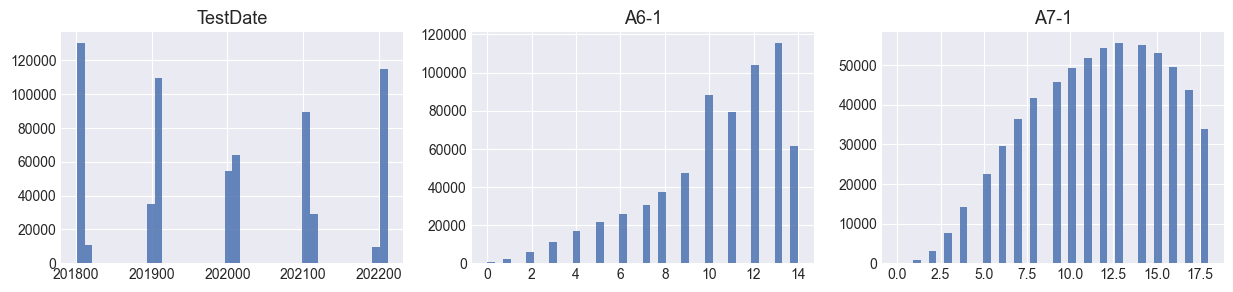

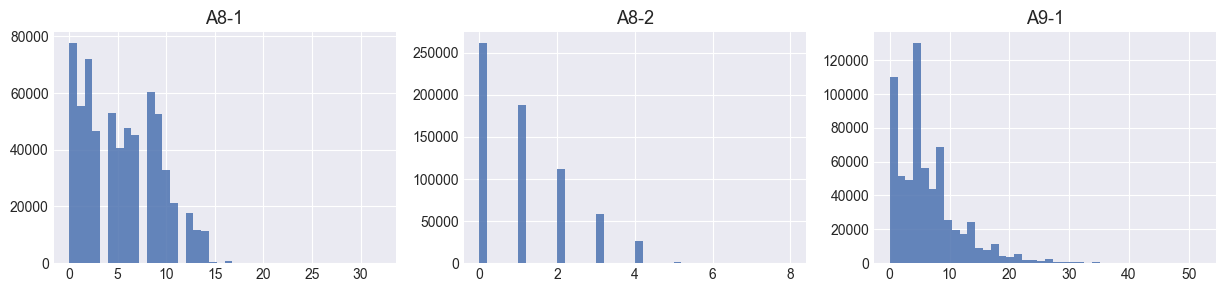

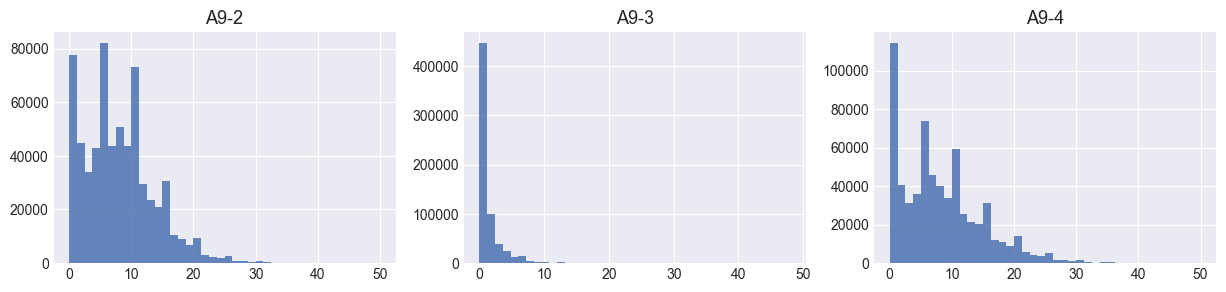

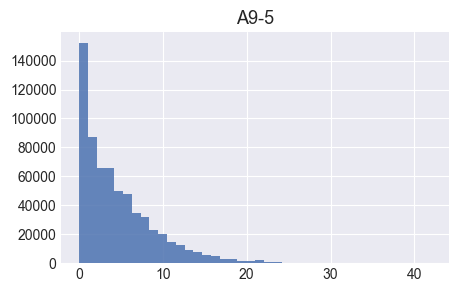

[B] numeric summary
numeric columns: 12


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
TestDate,297526.0,202051.250563,137.185355,201602.0,201610.0,201803.0,202002.0,202012.0,202202.0,202211.0,202212.0,202212.0
B9-1,297526.0,13.765177,3.802748,0.0,0.0,0.0,15.0,15.0,15.0,15.0,15.0,15.0
B9-2,297526.0,1.233916,3.801253,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0
B9-3,297526.0,0.856113,2.519378,0.0,0.0,0.0,0.0,0.0,1.0,4.0,12.0,35.0
B9-4,297526.0,34.141769,2.533327,0.0,23.0,31.0,34.0,35.0,35.0,35.0,35.0,35.0
B9-5,297526.0,2.308645,3.284854,0.0,0.0,0.0,0.0,1.0,3.0,8.0,14.0,33.0
B10-1,297526.0,17.227906,5.176604,0.0,0.0,0.0,18.0,19.0,20.0,20.0,20.0,20.0
B10-2,297526.0,2.772027,5.176510,0.0,0.0,0.0,0.0,1.0,2.0,20.0,20.0,20.0
B10-3,297526.0,2.563722,4.321101,0.0,0.0,0.0,0.0,2.0,3.0,8.0,20.0,60.0
B10-4,297526.0,57.436076,4.322381,0.0,40.0,52.0,57.0,58.0,60.0,60.0,60.0,60.0


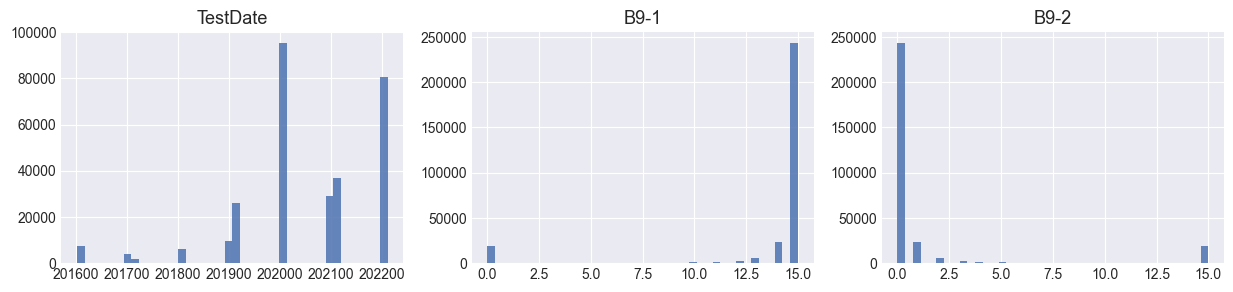

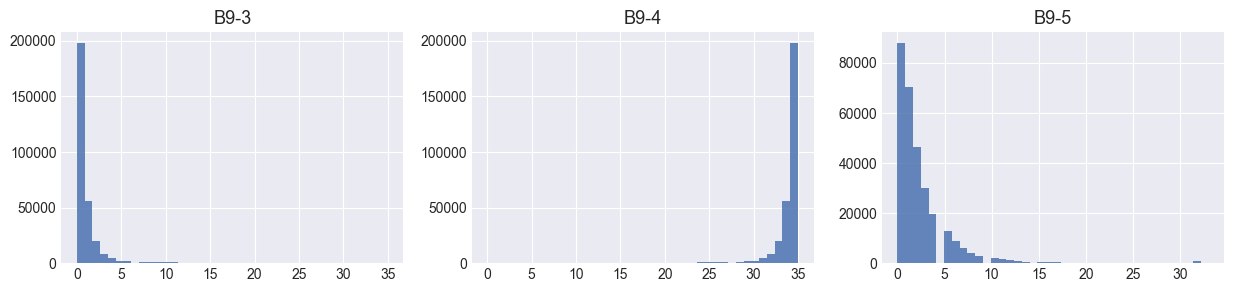

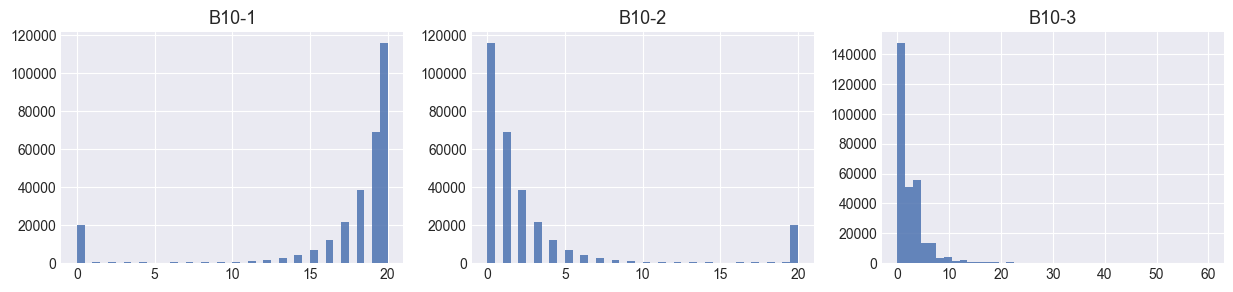

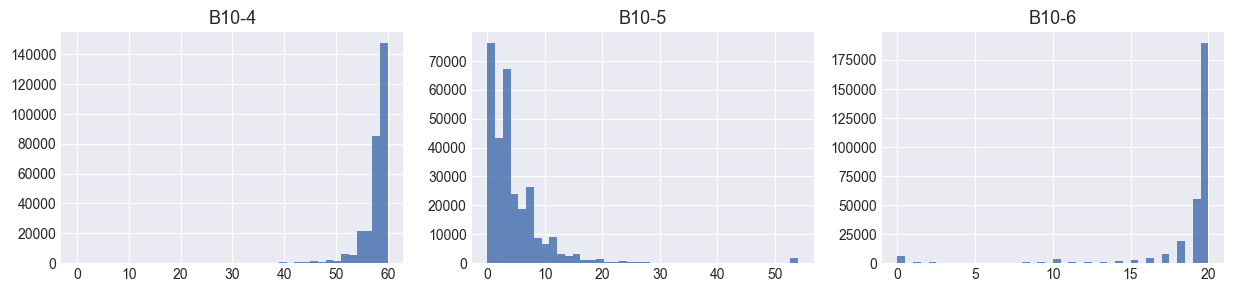

In [6]:
# 목적: 숫자형 통계 요약과 히스토그램으로 이상치/분포 파악
# - numeric_summary: describe(다양한 percentile) 출력
# - plot_histograms: 최대 max_plots까지 소분할 히스토그램

def numeric_summary(df: pd.DataFrame):
    df_n = drop_id_cols(df)
    num_cols = df_n.select_dtypes(include=[np.number]).columns.tolist()
    print('numeric columns:', len(num_cols))
    display(df_n[num_cols].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T.head(40))
    return df_n, num_cols

def plot_histograms(df: pd.DataFrame, cols: List[str], bins: int = 40, max_plots: int = 12):
    cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
    for i in range(0, min(len(cols), max_plots), 3):
        chunk = cols[i:i+3]
        if not chunk: break
        fig, axes = plt.subplots(1, len(chunk), figsize=(5*len(chunk), 3))
        if len(chunk) == 1: axes = [axes]
        for ax, c in zip(axes, chunk):
            s = pd.to_numeric(df[c], errors='coerce')
            s = s[np.isfinite(s)]
            ax.hist(s, bins=bins, color='#4C72B0', alpha=0.85)
            ax.set_title(c)
        plt.show()

print('[A] numeric summary')
A_num_df, A_num_cols = numeric_summary(A)
plot_histograms(A_num_df, A_num_cols)

print('[B] numeric summary')
B_num_df, B_num_cols = numeric_summary(B)
plot_histograms(B_num_df, B_num_cols)


## 5) 패턴 기반 확인: 반응시간/이진/코드형 (ID 컬럼 제외)

In [7]:
# 목적: 패턴 기반 열 탐색 (response/time/rt) 및 이진/소수코드 분포
# - show_response_time_distributions: 시간형 후보 히스토그램
# - show_binary_distributions: 고유값<=2
# - show_code_distributions: 3~10 고유값(코드형)

def cols_like(df: pd.DataFrame, patterns: List[str]) -> List[str]:
    regex = re.compile('|'.join(patterns), flags=re.IGNORECASE)
    return [c for c in df.columns if regex.search(str(c))]

def show_binary_distributions(df: pd.DataFrame, max_cols: int = 20):
    df_n = drop_id_cols(df)
    candidates = []
    for c in df_n.columns:
        s = pd.to_numeric(df_n[c], errors='coerce')
        nunq = s.dropna().nunique()
        if nunq <= 2: candidates.append(c)
    for c in candidates[:max_cols]:
        vc = pd.Series(pd.to_numeric(df_n[c], errors='coerce')).value_counts(dropna=False)
        print(f'[{c}] unique<=2')
        display(vc.to_frame('count'))

def show_code_distributions(df: pd.DataFrame, max_cols: int = 20):
    df_n = drop_id_cols(df)
    candidates = []
    for c in df_n.columns:
        s = pd.to_numeric(df_n[c], errors='coerce')
        nunq = s.dropna().nunique()
        if 3 <= nunq <= 10: candidates.append(c)
    for c in candidates[:max_cols]:
        vc = pd.Series(pd.to_numeric(df_n[c], errors='coerce')).value_counts(dropna=False).sort_index()
        print(f'[{c}] code-like (3~10 unique)')
        display(vc.to_frame('count'))

def show_response_time_distributions(df: pd.DataFrame, patterns: List[str] = ['response','time','rt']):
    df_n = drop_id_cols(df)
    cols = cols_like(df_n, patterns)
    cols = [c for c in cols if pd.api.types.is_numeric_dtype(df_n[c])]
    if not cols:
        print('no response/time-like numeric columns detected')
        return
    print('time-like columns:', cols[:12])
    for i in range(0, min(12, len(cols)), 3):
        chunk = cols[i:i+3]
        fig, axes = plt.subplots(1, len(chunk), figsize=(5*len(chunk), 3))
        if len(chunk) == 1: axes = [axes]
        for ax, c in zip(axes, chunk):
            s = pd.to_numeric(df_n[c], errors='coerce')
            s = s[np.isfinite(s)]
            ax.hist(s, bins=40, color='#55A868', alpha=0.85)
            ax.set_title(c)
        plt.show()

print('[A] response/time-like distributions')
show_response_time_distributions(A)
print('[B] response/time-like distributions')
show_response_time_distributions(B)

print('[A] binary-like distributions')
show_binary_distributions(A)
print('[B] binary-like distributions')
show_binary_distributions(B)

print('[A] small-code-like distributions')
show_code_distributions(A)
print('[B] small-code-like distributions')
show_code_distributions(B)


[A] response/time-like distributions
no response/time-like numeric columns detected
[B] response/time-like distributions
no response/time-like numeric columns detected
[A] binary-like distributions
[Age] unique<=2


,count
Age,
NaN,647241


[A1-1] unique<=2


,count
A1-1,
NaN,647241


[A1-2] unique<=2


,count
A1-2,
NaN,647241


[A1-3] unique<=2


,count
A1-3,
NaN,647241


[A1-4] unique<=2


,count
A1-4,
NaN,647241


[A2-1] unique<=2


,count
A2-1,
NaN,647241


[A2-2] unique<=2


,count
A2-2,
NaN,647241


[A2-3] unique<=2


,count
A2-3,
NaN,647241


[A2-4] unique<=2


,count
A2-4,
NaN,647241


[A3-1] unique<=2


,count
A3-1,
NaN,647241


[A3-2] unique<=2


,count
A3-2,
NaN,647241


[A3-3] unique<=2


,count
A3-3,
NaN,647241


[A3-4] unique<=2


,count
A3-4,
NaN,647241


[A3-5] unique<=2


,count
A3-5,
NaN,647241


[A3-6] unique<=2


,count
A3-6,
NaN,647241


[A3-7] unique<=2


,count
A3-7,
NaN,647241


[A4-1] unique<=2


,count
A4-1,
NaN,647241


[A4-2] unique<=2


,count
A4-2,
NaN,647241


[A4-3] unique<=2


,count
A4-3,
NaN,647241


[A4-4] unique<=2


,count
A4-4,
NaN,647241


[B] binary-like distributions
[Age] unique<=2


,count
Age,
NaN,297526


[B1-1] unique<=2


,count
B1-1,
NaN,297526


[B1-2] unique<=2


,count
B1-2,
NaN,297526


[B1-3] unique<=2


,count
B1-3,
NaN,297526


[B2-1] unique<=2


,count
B2-1,
NaN,297526


[B2-2] unique<=2


,count
B2-2,
NaN,297526


[B2-3] unique<=2


,count
B2-3,
NaN,297526


[B3-1] unique<=2


,count
B3-1,
NaN,297526


[B3-2] unique<=2


,count
B3-2,
NaN,297526


[B4-1] unique<=2


,count
B4-1,
NaN,297526


[B4-2] unique<=2


,count
B4-2,
NaN,297526


[B5-1] unique<=2


,count
B5-1,
NaN,297526


[B5-2] unique<=2


,count
B5-2,
NaN,297526


[B6] unique<=2


,count
B6,
NaN,297526


[B7] unique<=2


,count
B7,
NaN,297526


[B8] unique<=2


,count
B8,
NaN,297526


[A] small-code-like distributions
[A8-2] code-like (3~10 unique)


,count
A8-2,
0,261171
1,187608
2,112296
3,58673
4,25834
5,1351
6,269
7,35
8,4


[B] small-code-like distributions


## 6) Age 숫자/접미사(a/b) 분리 요약
- 예: `20a` → 숫자 20, 접미사 `a`
- 숫자/접미사/`Test` 조합별 건수와 비율을 확인합니다.


In [8]:
# 목적: Age에서 숫자와 접미사(a/b)를 분리하여 조합 빈도 확인
# - split_age: '20a' -> (20, 'a')로 파싱
# - summarize_age: Age_num/Age_suffix(/Test) 그룹 요약

import re
def split_age(s):
    if pd.isna(s):
        return (None, None)
    m = re.match(r'^(\d+)([A-Za-z]?)$', str(s).strip())
    if not m:
        return (None, None)
    num = int(m.group(1))
    suf = m.group(2).lower() if m.group(2) else None
    return (num, suf)

def summarize_age(df: pd.DataFrame, name: str):
    if 'Age' not in df.columns:
        print(f'[{name}] Age 컬럼 없음')
        return
    tmp = df[['Age']].copy()
    tmp[['Age_num','Age_suffix']] = tmp['Age'].apply(lambda x: pd.Series(split_age(x)))
    if 'Test' in df.columns:
        tmp['Test'] = df['Test']
    print(f'[{name}] Age 요약 (상위 20)')
    grp_cols = [c for c in ['Age_num','Age_suffix','Test'] if c in tmp.columns]
    tbl = tmp.groupby(grp_cols).size().reset_index(name='count').sort_values('count', ascending=False)
    tbl['ratio'] = (tbl['count'] / len(tmp)).round(4)
    display(tbl.head(20))

summarize_age(A, 'A')
summarize_age(B, 'B')


[A] Age 요약 (상위 20)


,Age_num,Age_suffix,Test,count,ratio
6,50,a,A,98475,0.1521
5,40,b,A,95265,0.1472
7,50,b,A,91526,0.1414
4,40,a,A,81617,0.1261
3,30,b,A,71463,0.1104
8,60,a,A,70295,0.1086
2,30,a,A,47333,0.0731
1,20,b,A,41515,0.0641
9,60,b,A,21746,0.0336
0,20,a,A,21303,0.0329


[B] Age 요약 (상위 20)


,Age_num,Age_suffix,Test,count,ratio
0,60,b,B,163331,0.5490
1,70,a,B,109115,0.3667
2,70,b,B,22612,0.0760
3,80,a,B,2398,0.0081
4,80,b,B,70,0.0002


## 7) PrimaryKey(사람 식별자) 중복 탐지
- 같은 `PrimaryKey`가 2회 이상 등장하는 행 수/사람 수를 집계
- `Test`별/전체 분포와 상위 다중 등장 예시를 확인합니다.


In [9]:
# 목적: PrimaryKey(사람 식별자) 중복 탐지 및 분포 확인
# - summarize_primarykey_dups: 중복 사람/행 수, Test별 중복 인원
# - A∩B 교차 등장: 두 데이터셋에 모두 있는 식별자 수

def summarize_primarykey_dups(df: pd.DataFrame, name: str):
    if 'PrimaryKey' not in df.columns:
        print(f'[{name}] PrimaryKey 컬럼 없음')
        return
    vc = df['PrimaryKey'].value_counts(dropna=False)
    dup_keys = vc[vc>1]
    num_dup_people = int((vc>1).sum())
    num_dup_rows = int(df['PrimaryKey'].duplicated(keep=False).sum())
    print(f'[{name}] 중복 사람 수:', num_dup_people, '| 중복 행 수:', num_dup_rows)
    if 'Test' in df.columns:
        print(f'[{name}] Test별 중복 사람 수')
        test_tbl = (df[df['PrimaryKey'].isin(dup_keys.index)]
                    .groupby('Test')['PrimaryKey']
                    .nunique()
                    .sort_values(ascending=False)
                   )
        display(test_tbl.to_frame('dup_people'))
    print(f'[{name}] 상위 중복 예시')
    display(dup_keys.head(20).to_frame('count'))

summarize_primarykey_dups(A, 'A')
summarize_primarykey_dups(B, 'B')

# A/B 합쳐서 중복 확인 (교차 중복 여부)
if set(['PrimaryKey']).issubset(A.columns) and set(['PrimaryKey']).issubset(B.columns):
    both = set(A['PrimaryKey']).intersection(set(B['PrimaryKey']))
    print('[A∩B] 교차로 등장하는 PrimaryKey 수:', len(both))


[A] 중복 사람 수: 31468 | 중복 행 수: 66847
[A] Test별 중복 사람 수


,dup_people
Test,
A,31468


[A] 상위 중복 예시


,count
PrimaryKey,
0x92739E4D094C1CFEC78B275570470CCE6F7CB84EB808320EFA221AF68A4835A7,9
0xB526577DFD62534B6575AD8E54E9652DA8C8CD0071EEF21798E40DA32485EF0C,8
0xB416C00F019A0D1AD8A5801AE399A215D777C89B7C009F2A688CA193B81E6321,8
0x1F41ECC663D7F7AD85651A67B33166E5E38E1B7D3F7E078B7C4ACF0DF7C640ED,8
0x2A661B899FEA6A68EBDD5D7D1815020B7C3BD25D3A28B3F7DD02C164245552DA,8
0xCDA158E39128CFF4C934923BBFE08A33E0AB3AA9C6BE88CB0F0D11AA3BEFA0A0,8
0xE4EFCC71DC90B0E2BDECD6B2EA0D14B83CDBD9E89F2BD49D3F083F5C8095E102,7
0xF10A3D11C87A5993E9C24B059DBEACC884A477BD8AD9BB4F23127796725CEA60,7
0xA68477DF4CDD90414E0C9BFEE7C07BE80D476980291A6B3A9E883AA75925DE25,7


[B] 중복 사람 수: 67480 | 중복 행 수: 177414
[B] Test별 중복 사람 수


,dup_people
Test,
B,67480


[B] 상위 중복 예시


,count
PrimaryKey,
0x437D5197405D627818BFEFC91ADEDF011A393C47A1DA123C6D76A0FC36BF865B,10
0xB3C71867DA8E4C8F03F950483E18BADDDDF027BD5B5EA5C918408471F4754F44,9
0x41236A664D307CC5658A6B3005B13D9D356CC30692B08F216152B48CAD7D3138,8
0x8971C0F298A9E220BCE0D65F75BC4D3D00F93C8A69742478A1A4DC2CBC237ACD,8
0x814AEC90F6A399138FC6A1FE20DB99791BE05C8D1B83ABC0285515878AF28FE4,8
0x58480B911F7FE2E8104DA89ECF96E4B61FBEE482537A2B61AA14C4730BBF4C06,8
0x14DD687AC7D73F564A62B35A594F1FBEADBE4AFB678F05908C9B1C145CE1B91E,8
0x7924E74866805BA6DF112DD34F44CE3C40935EA40B0899DD367F6CD09302581D,8
0x7FA38CB6134B32751CBC385C888537C953DABDA7DB5CCBB5118C01D8204FB5AC,8


[A∩B] 교차로 등장하는 PrimaryKey 수: 25212


## 8) Age 접미사(a/b)와 시험 시점(TestDate) 관계 검증
- 가설: 같은 사람(PrimaryKey) 기준으로 `b`가 `a`보다 나중(더 큰 날짜)일 가능성 검증
- 절차: TestDate 파싱 → 사람별 날짜 정렬 → (a,b) 쌍 비교 → 일치율/예외 케이스 집계

In [10]:
# 목적: TestDate를 숫자/날짜로 파싱하고, PrimaryKey 단위로 a/b 순서를 검증
import pandas as pd, numpy as np, re
from datetime import datetime

def parse_testdate(s):
    if pd.isna(s):
        return pd.NaT
    s = str(s).strip()
    # 6자리(YYYYMM) 또는 8자리(YYYYMMDD) 모두 허용
    if re.match(r'^\d{6}$', s):
        return pd.to_datetime(s+'01', format='%Y%m%d', errors='coerce')
    if re.match(r'^\d{8}$', s):
        return pd.to_datetime(s, format='%Y%m%d', errors='coerce')
    # 하이픈 포함 포맷도 허용
    try:
        return pd.to_datetime(s, errors='coerce')
    except Exception:
        return pd.NaT

def age_parts(s):
    if pd.isna(s): return (np.nan, None)
    m = re.match(r'^(\d+)([A-Za-z]?)$', str(s))
    if not m: return (np.nan, None)
    return (float(m.group(1)), (m.group(2) or '').lower() or None)

def ab_order_analysis(df: pd.DataFrame, name: str):
    needed = {'PrimaryKey','Age','TestDate'}
    if not needed.issubset(df.columns):
        print(f'[{name}] 필요한 컬럼 부족:', needed - set(df.columns))
        return
    t = df[['PrimaryKey','Age','TestDate']].copy()
    t['Age_num'], t['Age_suffix'] = zip(*t['Age'].map(age_parts))
    t['Date'] = df['TestDate'].map(parse_testdate)
    t = t.dropna(subset=['PrimaryKey','Age_suffix','Date'])

    # 같은 사람의 a/b 두 기록만 취해 비교 (a,b 모두 존재하는 경우)
    subset = t[t['Age_suffix'].isin(['a','b'])] 
    has_both = subset.groupby('PrimaryKey')['Age_suffix'].nunique()==2
    keys = has_both[has_both].index
    pair = subset[subset['PrimaryKey'].isin(keys)].copy()

    # wide 형태로 변환하여 날짜 비교
    wide = (pair.pivot_table(index='PrimaryKey', columns='Age_suffix', values='Date', aggfunc='max'))
    wide = wide.dropna(subset=['a','b'], how='any')
    total = len(wide)
    if total == 0:
        print(f'[{name}] a/b 쌍 없음')
        return
    later_b = (wide['b'] > wide['a']).sum()
    equal = (wide['b'] == wide['a']).sum()
    later_a = (wide['b'] < wide['a']).sum()
    print(f'[{name}] a/b 쌍 수:', total)
    print(f' - b가 더 나중: {later_b} ({later_b/total:.2%})')
    print(f' - 동일 날짜: {equal} ({equal/total:.2%})')
    print(f' - a가 더 나중: {later_a} ({later_a/total:.2%})')

ab_order_analysis(A, 'A')
ab_order_analysis(B, 'B')


[A] a/b 쌍 수: 8886
 - b가 더 나중: 4415 (49.68%)
 - 동일 날짜: 0 (0.00%)
 - a가 더 나중: 4471 (50.32%)
[B] a/b 쌍 수: 34500
 - b가 더 나중: 6163 (17.86%)
 - 동일 날짜: 0 (0.00%)
 - a가 더 나중: 28337 (82.14%)


## 9) a/b별 Test · 점수 분포 비교
- 목적: 같은 사람(PrimaryKey) 내에서 a/b의 Test 분포와 점수 요약 비교
- 방법: `Age`에서 접미사(a/b) 추출 → a/b만 필터 → Test 교차표와 주요 점수 통계(describe)


In [13]:
# a/b 분포 비교 함수 및 실행
from typing import List, Optional

def compare_ab_distributions(
    df: pd.DataFrame,
    name: str,
    score_cols: Optional[List[str]] = None,
    preview: int = 10,
    paired_only: bool = True,
):
    # Age에서 접미사 추출
    tmp = df.copy()
    if 'Age' not in tmp.columns:
        print(f'[{name}] Age 컬럼 없음')
        return
    tmp[['Age_num','Age_suffix']] = tmp['Age'].apply(lambda x: pd.Series(split_age(x)))

    sub = tmp[tmp['Age_suffix'].isin(['a','b'])].copy()
    if paired_only:
        has_both = sub.groupby('PrimaryKey')['Age_suffix'].nunique() == 2
        sub = sub[sub['PrimaryKey'].isin(has_both[has_both].index)]

    if sub.empty:
        print(f'[{name}] a/b 행 없음')
        return

    # Test 분포 교차표
    if 'Test' in sub.columns:
        print(f'[{name}] Test 분포 (a/b)')
        display(sub.pivot_table(index='Test', columns='Age_suffix', aggfunc='size', fill_value=0))
    else:
        print(f'[{name}] Test 컬럼 없음, Test 분포 스킵')

    # 점수 컬럼 결정: 숫자형 중 식별/메타 제외
    if score_cols is None:
        candidates = sub.select_dtypes(include=[np.number]).columns.tolist()
        score_cols = [c for c in candidates if c not in set(ID_COLS + ['Age_num'])]

    # 통계 요약 (미리보기 N개)
    for c in score_cols[:preview]:
        print(f'[{name}] {c} 요약 (a/b)')
        display(sub.groupby('Age_suffix')[c].describe().round(3))

print('[A] a/b 비교')
compare_ab_distributions(A, 'A')
print('[B] a/b 비교')
compare_ab_distributions(B, 'B')


[A] a/b 비교
[A] Test 분포 (a/b)


Age_suffix,a,b
Test,,
A,9684,9662


[A] TestDate 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,9684.0,202005.813,165.048,201801.0,201810.0,202005.0,202203.0,202212.0
b,9662.0,202001.149,165.696,201801.0,201810.0,202004.0,202203.0,202212.0


[A] A6-1 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,9684.0,10.038,3.100,0.0,8.0,11.0,13.0,14.0
b,9662.0,10.029,3.117,0.0,8.0,11.0,13.0,14.0


[A] A7-1 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,9684.0,11.327,4.079,0.0,8.0,12.0,15.0,18.0
b,9662.0,11.346,4.094,0.0,8.0,12.0,15.0,18.0


[A] A8-1 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,9684.0,5.219,3.885,0.0,2.0,5.0,8.0,18.0
b,9662.0,5.226,3.867,0.0,2.0,5.0,8.0,32.0


[A] A8-2 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,9684.0,1.112,1.219,0.0,0.0,1.0,2.0,6.0
b,9662.0,1.106,1.221,0.0,0.0,1.0,2.0,7.0


[A] A9-1 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,9684.0,6.360,6.146,0.0,2.0,5.0,9.0,52.0
b,9662.0,6.391,6.183,0.0,2.0,5.0,8.0,52.0


[A] A9-2 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,9684.0,7.833,6.068,0.0,3.0,7.0,11.0,50.0
b,9662.0,7.873,6.115,0.0,3.0,7.0,11.0,48.0


[A] A9-3 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,9684.0,1.424,2.659,0.0,0.0,1.0,2.0,40.0
b,9662.0,1.440,2.857,0.0,0.0,1.0,2.0,48.0


[A] A9-4 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,9684.0,8.040,7.154,0.0,2.0,7.0,12.0,50.0
b,9662.0,8.039,7.181,0.0,2.0,7.0,12.0,50.0


[A] A9-5 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,9684.0,4.655,4.723,0.0,1.0,3.0,7.0,38.0
b,9662.0,4.694,4.766,0.0,1.0,3.0,7.0,42.0


[B] a/b 비교
[B] Test 분포 (a/b)


Age_suffix,a,b
Test,,
B,55334,42382


[B] TestDate 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,55334.0,202096.983,132.747,201603.0,202010.0,202110.0,202206.0,202212.0
b,42382.0,201962.234,163.896,201602.0,201910.0,202002.0,202012.0,202212.0


[B] B9-1 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,55334.0,13.927,3.545,0.0,15.0,15.0,15.0,15.0
b,42382.0,12.379,5.482,0.0,14.0,15.0,15.0,15.0


[B] B9-2 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,55334.0,1.073,3.545,0.0,0.0,0.0,0.0,15.0
b,42382.0,2.618,5.480,0.0,0.0,0.0,1.0,15.0


[B] B9-3 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,55334.0,0.769,2.300,0.0,0.0,0.0,1.0,35.0
b,42382.0,0.823,2.404,0.0,0.0,0.0,1.0,35.0


[B] B9-4 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,55334.0,34.231,2.300,0.0,34.0,35.0,35.0,35.0
b,42382.0,34.171,2.449,0.0,34.0,35.0,35.0,35.0


[B] B9-5 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,55334.0,2.101,2.940,0.0,0.0,1.0,3.0,33.0
b,42382.0,2.291,3.188,0.0,0.0,1.0,3.0,33.0


[B] B10-1 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,55334.0,17.571,4.846,0.0,18.0,19.0,20.0,20.0
b,42382.0,15.432,7.126,0.0,16.0,19.0,20.0,20.0


[B] B10-2 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,55334.0,2.429,4.846,0.0,0.0,1.0,2.0,20.0
b,42382.0,4.568,7.126,0.0,0.0,1.0,4.0,20.0


[B] B10-3 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,55334.0,2.39,3.947,0.0,0.0,1.0,3.0,60.0
b,42382.0,2.45,4.212,0.0,0.0,1.0,3.0,60.0


[B] B10-4 요약 (a/b)


,count,mean,std,min,25%,50%,75%,max
Age_suffix,,,,,,,,
a,55334.0,57.61,3.947,0.0,57.0,59.0,60.0,60.0
b,42382.0,57.55,4.212,0.0,57.0,59.0,60.0,60.0


In [15]:
# 지정된 연속형 지표만 대상, 방향성 수동 지정
SELECTED_CONT_COLS = [
    'A6-1', 'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5'
]
LOWER_BETTER_SET = {'A8-1', 'A9-5'}  # (−) 표기된 지표


def summarize_b_better_for_selected(df: pd.DataFrame, name: str = 'A', agg: str = 'mean') -> pd.DataFrame:
    if 'PrimaryKey' not in df.columns or 'Age' not in df.columns:
        print(f'[{name}] 필요한 컬럼 없음(PrimaryKey/Age)')
        return pd.DataFrame()

    tmp = df.copy()
    tmp[['Age_num','Age_suffix']] = tmp['Age'].apply(lambda x: pd.Series(split_age(x)))
    sub = tmp[tmp['Age_suffix'].isin(['a','b'])].copy()
    # 같은 사람 쌍만
    has_both = sub.groupby('PrimaryKey')['Age_suffix'].nunique() == 2
    sub = sub[sub['PrimaryKey'].isin(has_both[has_both].index)].copy()

    if agg not in ('mean','median','max','min'):
        agg = 'mean'
    aggfunc = {'mean':'mean','median':'median','max':'max','min':'min'}[agg]

    rows = []
    cols = [c for c in SELECTED_CONT_COLS if c in sub.columns]
    for c in cols:
        pivot = (sub.groupby(['PrimaryKey','Age_suffix'])[c]
                   .agg(aggfunc)
                   .unstack('Age_suffix'))
        pivot = pivot.dropna(subset=['a','b'], how='any')
        if pivot.empty:
            continue
        # 방향성 반영
        if c in LOWER_BETTER_SET:
            improvement = pivot['a'] - pivot['b']
            lower_is_better = True
        else:
            improvement = pivot['b'] - pivot['a']
            lower_is_better = False
        n = improvement.shape[0]
        rows.append({
            'column': c,
            'pairs': n,
            'lower_is_better': lower_is_better,
            'rate_b_better': float((improvement > 0).mean()),
            'mean_improvement': float(np.nanmean(improvement)),
            'median_improvement': float(np.nanmedian(improvement)),
        })

    out = pd.DataFrame(rows).sort_values(['rate_b_better','mean_improvement'], ascending=[False, False])
    print(f'[{name}] 선택 지표 결과')
    display(out)
    if not out.empty:
        print(f"전체 평균 rate_b_better = {out['rate_b_better'].mean():.2%}")
    return out

print('[A] 선택 연속형 지표에서 b가 더 좋은 비율')
_ = summarize_b_better_for_selected(A, name='A', agg='mean')


[A] 선택 연속형 지표에서 b가 더 좋은 비율
[A] 선택 지표 결과


,column,pairs,lower_is_better,rate_b_better,mean_improvement,median_improvement
5,A9-2,8886,False,0.453860,-0.006232,0.0
7,A9-4,8886,False,0.441931,-0.009236,0.0
4,A9-1,8886,False,0.434729,0.018865,0.0
1,A7-1,8886,False,0.433378,0.006125,0.0
2,A8-1,8886,True,0.432816,-0.010383,0.0
8,A9-5,8886,True,0.413009,-0.019695,0.0
0,A6-1,8886,False,0.398267,-0.013637,0.0
3,A8-2,8886,False,0.315890,-0.006960,0.0
6,A9-3,8886,False,0.290007,-0.007473,0.0


전체 평균 rate_b_better = 40.15%


## 10) 연속형(자동) + 지정 목록 합본 비교
- 같은 사람의 a/b 쌍만 사용
- 대상 컬럼: 연속형 자동선정 컬럼 ∪ 지정 컬럼(A6-1, A7-1, A8-1(-), A8-2, A9-1~A9-5(-))
- 방향성: 지정 규칙 우선, 없으면 컬럼명 `(-)` 여부로 판정
- 출력: 컬럼별 b가 더 좋은 비율, 개선량 통계


In [16]:
# 합본 비교 (셀 하나로 자족하도록 헬퍼 포함)
from typing import List

# 지정 목록 및 방향성
SELECTED_CONT_COLS = [
    'A6-1', 'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5'
]
LOWER_BETTER_SET = {'A8-1', 'A9-5'}  # (−) 표기 지표는 낮을수록 좋음

# 이름 기반 방향성 판단
def is_lower_better(col_name: str) -> bool:
    return '(-)' in str(col_name)

# 자동 연속형 선택(숫자형 + 고유값 임계)
def select_continuous_columns(df: pd.DataFrame, min_unique: int = 15) -> list[str]:
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    blacklist = set(ID_COLS + ['Age_num'])
    candidates = [c for c in num_cols if c not in blacklist]
    return [c for c in candidates if df[c].nunique(dropna=True) >= min_unique]

# 합본 요약
def summarize_b_better_union(df: pd.DataFrame, name: str = 'A', min_unique: int = 15, agg: str = 'mean', preview: int = 80) -> pd.DataFrame:
    if 'PrimaryKey' not in df.columns or 'Age' not in df.columns:
        print(f'[{name}] 필요한 컬럼 없음(PrimaryKey/Age)')
        return pd.DataFrame()

    tmp = df.copy()
    tmp[['Age_num','Age_suffix']] = tmp['Age'].apply(lambda x: pd.Series(split_age(x)))
    sub = tmp[tmp['Age_suffix'].isin(['a','b'])].copy()
    has_both = sub.groupby('PrimaryKey')['Age_suffix'].nunique() == 2
    sub = sub[sub['PrimaryKey'].isin(has_both[has_both].index)].copy()
    if sub.empty:
        print(f'[{name}] a/b 쌍 없음')
        return pd.DataFrame()

    auto_cols = select_continuous_columns(sub, min_unique=min_unique)
    selected_cols = [c for c in SELECTED_CONT_COLS if c in sub.columns]
    cols = list(dict.fromkeys(auto_cols + selected_cols))  # 중복 제거 보존

    if agg not in ('mean','median','max','min'):
        agg = 'mean'
    aggfunc = {'mean':'mean','median':'median','max':'max','min':'min'}[agg]

    rows = []
    for c in cols[:preview]:
        pivot = (sub.groupby(['PrimaryKey','Age_suffix'])[c]
                   .agg(aggfunc)
                   .unstack('Age_suffix'))
        pivot = pivot.dropna(subset=['a','b'], how='any')
        if pivot.empty:
            continue
        # 방향성: 지정 우선 → 없으면 이름 기반
        if c in LOWER_BETTER_SET:
            lower_is_better = True
            improvement = pivot['a'] - pivot['b']
        else:
            lower_is_better = is_lower_better(c)
            improvement = (pivot['a'] - pivot['b']) if lower_is_better else (pivot['b'] - pivot['a'])

        rows.append({
            'column': c,
            'pairs': int(pivot.shape[0]),
            'lower_is_better': lower_is_better,
            'rate_b_better': float((improvement > 0).mean()),
            'mean_improvement': float(np.nanmean(improvement)),
            'median_improvement': float(np.nanmedian(improvement)),
        })

    out = pd.DataFrame(rows).sort_values(['rate_b_better','mean_improvement'], ascending=[False, False])
    print(f'[{name}] 합본 결과 (상위 {min(len(out), preview)}개)')
    display(out.head(preview))
    if not out.empty:
        print(f"전체 평균 rate_b_better = {out['rate_b_better'].mean():.2%}")
    return out

print('[A] 합본(연속형 자동 + 지정) 비교')
_ = summarize_b_better_union(A, name='A', min_unique=15, agg='mean', preview=120)


[A] 합본(연속형 자동 + 지정) 비교
[A] 합본 결과 (상위 10개)


,column,pairs,lower_is_better,rate_b_better,mean_improvement,median_improvement
0,TestDate,8886,False,0.496849,-3.972046,-1.0
5,A9-2,8886,False,0.453860,-0.006232,0.0
7,A9-4,8886,False,0.441931,-0.009236,0.0
4,A9-1,8886,False,0.434729,0.018865,0.0
2,A7-1,8886,False,0.433378,0.006125,0.0
3,A8-1,8886,True,0.432816,-0.010383,0.0
8,A9-5,8886,True,0.413009,-0.019695,0.0
1,A6-1,8886,False,0.398267,-0.013637,0.0
9,A8-2,8886,False,0.315890,-0.006960,0.0
6,A9-3,8886,False,0.290007,-0.007473,0.0


전체 평균 rate_b_better = 41.11%


In [17]:
# 시간순 정렬 시 b가 먼저, a가 나중인 사람(역전) 탐지
def find_suffix_inversion(df, name):
    if not {'PrimaryKey','Age','TestDate'}.issubset(df.columns):
        print(f'[{name}] 필요한 컬럼 없음')
        return pd.Index([])
    tmp = df[['PrimaryKey','Age','TestDate']].copy()
    tmp[['Age_num','Age_suffix']] = tmp['Age'].apply(lambda x: pd.Series(split_age(x)))
    tmp['Date'] = tmp['TestDate'].map(parse_testdate)
    tmp = tmp.dropna(subset=['PrimaryKey','Age_suffix','Date'])
    tmp = tmp[tmp['Age_suffix'].isin(['a','b'])]

    # 사람별 시간순 정렬 후 첫/마지막 접미사 확인
    tmp = tmp.sort_values(['PrimaryKey','Date'])
    first_last = tmp.groupby('PrimaryKey')['Age_suffix'].agg(first='first', last='last')
    inverted_keys = first_last[(first_last['first']=='b') & (first_last['last']=='a')].index

    print(f'[{name}] 역전(b→a) 사람 수:', len(inverted_keys))
    display(pd.DataFrame({'PrimaryKey': list(inverted_keys)}).head(20))
    return inverted_keys

inv_A = find_suffix_inversion(A, 'A')
inv_B = find_suffix_inversion(B, 'B')

[A] 역전(b→a) 사람 수: 4471


,PrimaryKey
0,0x001C381E7B759C797FD733516008CFAD2AB6027051F6...
1,0x001FF41B99A7B4BFD9D88ADF70BBA0822D007962C4D3...
2,0x002CC5D66E37A0BFE146DA3A2216B680E2AD934F2777...
3,0x0035FB11FB2FACF0A1CFF333E9D9BBE419AA38074301...
4,0x0048F4F2E925B7820F79DA645DFE612446BD3F3A8F11...
5,0x004D72CF72A9B9129876F6DE90C2281E52E30246F2E7...
6,0x005848A9B27658BDCFE1AAB32520B46A4384843ADE9B...
7,0x0066ACA55273B67CB5F44E584E524323A31BE4B8D2B9...
8,0x00682BCB9EEE9F752F97F362676C7CB992E4F694923B...
9,0x006AC2B7F3CD74EE22ED2085BB2E95A5E0E7ABFB1A03...


[B] 역전(b→a) 사람 수: 28310


,PrimaryKey
0,0x000B6316DFA0F2B43F4817A9529947A698434607AC33...
1,0x000CF5D94AB301E9B8CA508D2A5FA73A96935C7D0904...
2,0x000EE888C146650F773A2053A049B7541905B8431A35...
3,0x00106484A2D7BD737A803B27DD7E5E88896D92647704...
4,0x00139BBA7BC49CD44709FAECE5CC62C78336E9577CAD...
5,0x00183ABCA1D5AAE99E249FBA912FD596A6C349C30A44...
6,0x0018545FA46DD238ED862CDA4ADF5100DC3CC9D4AAF1...
7,0x001DFAC940A066B7C232C15DEFF08F3D24FCE4EAD86D...
8,0x001F68733188E8B1C832CDA4DB9E9111A13950EFAE6C...
9,0x001FBC36F487419837B0F68F98F62745C2E9ADC10236...


[A] 시퀀스 행(두 컬럼 모두 길이>0 고려) 수: 647241
[A] A1-3==0 위치에서 수집된 A1-4 값 개수: 11482025
기초 통계:


,A1-4 (A1-3==0)
count,1.148202e+07
mean,-1.508800e+01
std,6.525900e+01
min,-3.200000e+02
1%,-1.820000e+02
5%,-1.140000e+02
25%,-5.400000e+01
50%,-2.000000e+01
75%,2.200000e+01
95%,9.200000e+01


/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pyla

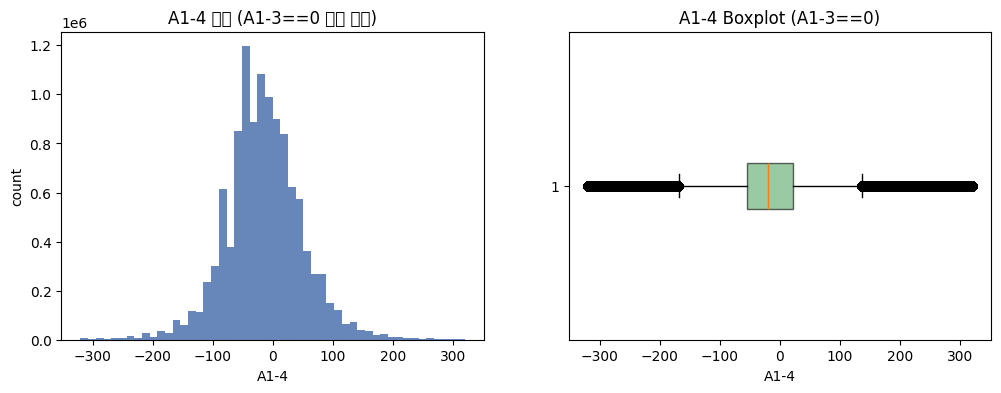

In [3]:
# A1 검사: 시퀀스(콤마 구분) 기준으로 A1-3==0 위치의 A1-4 모두 시각화
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A가 없다면 이 셀에서 A.csv를 자동 탐색/로드
if 'A' not in globals():
    PROJECT_ROOT = os.path.abspath(os.getcwd())
    DATA_CANDIDATES = [
        os.path.join(PROJECT_ROOT, 'project', 'data'),
        os.path.join(PROJECT_ROOT, 'data'),
        PROJECT_ROOT,
    ]
    def _find_file(filename: str):
        for base in DATA_CANDIDATES:
            p0 = os.path.join(base, filename)
            if os.path.isfile(p0):
                return p0
            for sub in ('train','test'):
                p1 = os.path.join(base, sub, filename)
                if os.path.isfile(p1):
                    return p1
        return None
    _A_PATH = _find_file('A.csv')
    if _A_PATH is None:
        raise FileNotFoundError('A.csv 경로를 찾을 수 없습니다. project/data/ 에 파일을 넣어 주세요.')
    A = pd.read_csv(_A_PATH)

col_flag = 'A1-3'  # 0/1 등이 콤마로 나열된 플래그 시퀀스
col_rt = 'A1-4'    # 반응시간 시퀀스(콤마로 나열)

missing = [c for c in [col_flag, col_rt] if c not in A.columns]
if missing:
    print('A 데이터에 필요한 컬럼이 없습니다:', missing)
else:
    def parse_seq(val):
        if pd.isna(val):
            return []
        if isinstance(val, (list, tuple, np.ndarray)):
            return [pd.to_numeric(x, errors='coerce') for x in val]
        s = str(val)
        parts = [p.strip() for p in s.split(',')]
        out = []
        for p in parts:
            if p == '':
                out.append(np.nan)
            else:
                try:
                    out.append(float(p))
                except Exception:
                    out.append(np.nan)
        return out

    values = []  # A1-3==0 위치의 A1-4 값 전부 수집
    row_count = 0
    for _, row in A[[col_flag, col_rt]].iterrows():
        f_list = parse_seq(row[col_flag])
        r_list = parse_seq(row[col_rt])
        m = min(len(f_list), len(r_list))
        if m == 0:
            continue
        row_count += 1
        for i in range(m):
            f = f_list[i]
            r = r_list[i]
            if pd.notna(f) and pd.notna(r) and f == 0:
                values.append(r)

    values = pd.Series(values, dtype=float)
    values = values[np.isfinite(values)]

    print('[A] 시퀀스 행(두 컬럼 모두 길이>0 고려) 수:', row_count)
    print('[A] A1-3==0 위치에서 수집된 A1-4 값 개수:', int(values.shape[0]))

    if values.empty:
        print('수집된 유효 반응시간이 없습니다.')
    else:
        print('기초 통계:')
        desc = values.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).round(3)
        display(desc.to_frame('A1-4 (A1-3==0)'))

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        axes[0].hist(values, bins=50, color='#4C72B0', alpha=0.85)
        axes[0].set_title('A1-4 분포 (A1-3==0 위치 전체)')
        axes[0].set_xlabel('A1-4')
        axes[0].set_ylabel('count')

        axes[1].boxplot(values.values, vert=False, patch_artist=True, boxprops=dict(facecolor='#55A868', alpha=0.6))
        axes[1].set_title('A1-4 Boxplot (A1-3==0)')
        axes[1].set_xlabel('A1-4')
        plt.show()


[A] A1-3==1 분석
 - 시퀀스 고려 행 수: 647241
 - A1-3==1 위치가 존재하는 행 수: 66141
 - A1-3==1 위치 총 개수(포지션 수): 168313
 - 유효 반응시간 수: 168313


,A1-4 (A1-3==1)
count,168313.000
mean,389.356
std,491.547
min,-865.000
1%,-862.000
5%,-828.000
25%,396.000
50%,597.000
75%,722.000
95%,725.000


/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pyla

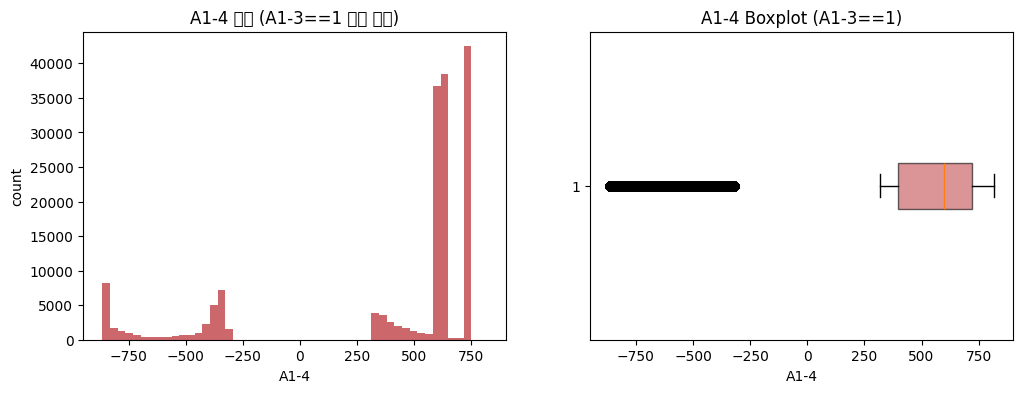

In [ ]:
# A1 검사: A1-3==1 위치의 A1-4 분포와 카운트
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A가 없다면 로드
if 'A' not in globals():
    PROJECT_ROOT = os.path.abspath(os.getcwd())
    DATA_CANDIDATES = [
        os.path.join(PROJECT_ROOT, 'project', 'data'),
        os.path.join(PROJECT_ROOT, 'data'),
        PROJECT_ROOT,
    ]
    def _find_file(filename: str):
        for base in DATA_CANDIDATES:
            p0 = os.path.join(base, filename)
            if os.path.isfile(p0):
                return p0
            for sub in ('train','test'):
                p1 = os.path.join(base, sub, filename)
                if os.path.isfile(p1):
                    return p1
        return None
    _A_PATH = _find_file('A.csv')
    if _A_PATH is None:
        raise FileNotFoundError('A.csv 경로를 찾을 수 없습니다. project/data/ 에 파일을 넣어 주세요.')
    A = pd.read_csv(_A_PATH)

col_flag = 'A1-3'
col_rt = 'A1-4'

if any(c not in A.columns for c in [col_flag, col_rt]):
    print('A 데이터에 필요한 컬럼이 없습니다:', [c for c in [col_flag, col_rt] if c not in A.columns])
else:
    # parse_seq가 없으면 정의
    if 'parse_seq' not in globals():
        def parse_seq(val):
            if pd.isna(val):
                return []
            if isinstance(val, (list, tuple, np.ndarray)):
                return [pd.to_numeric(x, errors='coerce') for x in val]
            s = str(val)
            parts = [p.strip() for p in s.split(',')]
            out = []
            for p in parts:
                if p == '':
                    out.append(np.nan)
                else:
                    try:
                        out.append(float(p))
                    except Exception:
                        out.append(np.nan)
            return out

    def collect_values_by_flag(df: pd.DataFrame, flag_value: float):
        values = []
        rows_considered = 0
        rows_with_any = 0
        positions = 0
        for _, row in df[[col_flag, col_rt]].iterrows():
            f_list = parse_seq(row[col_flag])
            r_list = parse_seq(row[col_rt])
            m = min(len(f_list), len(r_list))
            if m == 0:
                continue
            rows_considered += 1
            any_added = False
            for i in range(m):
                f = f_list[i]
                r = r_list[i]
                if pd.notna(f) and pd.notna(r) and f == flag_value:
                    values.append(r)
                    positions += 1
                    any_added = True
            if any_added:
                rows_with_any += 1
        s = pd.Series(values, dtype=float)
        s = s[np.isfinite(s)]
        return s, rows_considered, rows_with_any, positions

    values1, rows_considered1, rows_with_any1, positions1 = collect_values_by_flag(A, 1)

    print('[A] A1-3==1 분석')
    print(' - 시퀀스 고려 행 수:', rows_considered1)
    print(' - A1-3==1 위치가 존재하는 행 수:', rows_with_any1)
    print(' - A1-3==1 위치 총 개수(포지션 수):', positions1)
    print(' - 유효 반응시간 수:', int(values1.shape[0]))

    if values1.empty:
        print('수집된 유효 반응시간이 없습니다.')
    else:
        desc1 = values1.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).round(3)
        display(desc1.to_frame('A1-4 (A1-3==1)'))

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        axes[0].hist(values1, bins=50, color='#C44E52', alpha=0.85)
        axes[0].set_title('A1-4 분포 (A1-3==1 위치 전체)')
        axes[0].set_xlabel('A1-4')
        axes[0].set_ylabel('count')

        axes[1].boxplot(values1.values, vert=False, patch_artist=True, boxprops=dict(facecolor='#C44E52', alpha=0.6))
        axes[1].set_title('A1-4 Boxplot (A1-3==1)')
        axes[1].set_xlabel('A1-4')
        plt.show()


[A] A2-3==0 분석
 - 시퀀스 고려 행 수: 647240
 - A2-3==0 위치가 존재하는 행 수: 647220
 - A2-3==0 위치 총 개수(포지션 수): 11559890
 - 유효 반응시간 수: 11559890

[A] A2-3==1 분석
 - 시퀀스 고려 행 수: 647240
 - A2-3==1 위치가 존재하는 행 수: 65546
 - A2-3==1 위치 총 개수(포지션 수): 90430
 - 유효 반응시간 수: 90430


,A2-4 (flag=0)
count,1.155989e+07
mean,-3.620800e+01
std,5.630900e+01
min,-2.840000e+02
1%,-1.870000e+02
5%,-1.270000e+02
25%,-7.400000e+01
50%,-3.300000e+01
75%,0.000000e+00
95%,4.800000e+01


,A2-4 (flag=1)
count,90430.000
mean,375.290
std,730.041
min,-645.000
1%,-576.000
5%,-575.000
25%,-534.000
50%,999.000
75%,999.000
95%,999.000


/var/folders/8g/x3kqv_gx5hdb25l1fv6qd8jw0000gn/T/ipykernel_54034/4279602599.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_for_box, vert=False, patch_artist=True,
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


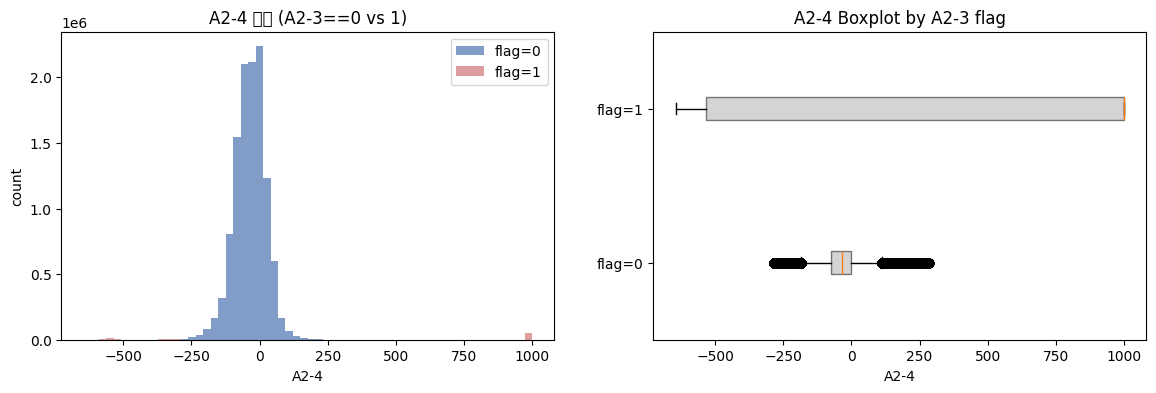

In [ ]:
# A2 검사: 시퀀스 기준 A2-3 플래그(0/1) 위치의 A2-4 비교
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A가 없다면 로드
if 'A' not in globals():
    PROJECT_ROOT = os.path.abspath(os.getcwd())
    DATA_CANDIDATES = [
        os.path.join(PROJECT_ROOT, 'project', 'data'),
        os.path.join(PROJECT_ROOT, 'data'),
        PROJECT_ROOT,
    ]
    def _find_file(filename: str):
        for base in DATA_CANDIDATES:
            p0 = os.path.join(base, filename)
            if os.path.isfile(p0):
                return p0
            for sub in ('train','test'):
                p1 = os.path.join(base, sub, filename)
                if os.path.isfile(p1):
                    return p1
        return None
    _A_PATH = _find_file('A.csv')
    if _A_PATH is None:
        raise FileNotFoundError('A.csv 경로를 찾을 수 없습니다. project/data/ 에 파일을 넣어 주세요.')
    A = pd.read_csv(_A_PATH)

col_flag = 'A2-3'
col_rt = 'A2-4'

if any(c not in A.columns for c in [col_flag, col_rt]):
    print('A 데이터에 필요한 컬럼이 없습니다:', [c for c in [col_flag, col_rt] if c not in A.columns])
else:
    # 필요한 유틸 준비
    if 'parse_seq' not in globals():
        def parse_seq(val):
            if pd.isna(val):
                return []
            if isinstance(val, (list, tuple, np.ndarray)):
                return [pd.to_numeric(x, errors='coerce') for x in val]
            s = str(val)
            parts = [p.strip() for p in s.split(',')]
            out = []
            for p in parts:
                if p == '':
                    out.append(np.nan)
                else:
                    try:
                        out.append(float(p))
                    except Exception:
                        out.append(np.nan)
            return out
    if 'collect_values_by_flag_generic' not in globals():
        def collect_values_by_flag_generic(df: pd.DataFrame, flag_col: str, rt_col: str, flag_value: float):
            values = []
            rows_considered = 0
            rows_with_any = 0
            positions = 0
            for _, row in df[[flag_col, rt_col]].iterrows():
                f_list = parse_seq(row[flag_col])
                r_list = parse_seq(row[rt_col])
                m = min(len(f_list), len(r_list))
                if m == 0:
                    continue
                rows_considered += 1
                any_added = False
                for i in range(m):
                    f = f_list[i]
                    r = r_list[i]
                    if pd.notna(f) and pd.notna(r) and f == flag_value:
                        values.append(r)
                        positions += 1
                        any_added = True
                if any_added:
                    rows_with_any += 1
            s = pd.Series(values, dtype=float)
            s = s[np.isfinite(s)]
            return s, rows_considered, rows_with_any, positions

    values0, rows_considered0, rows_with_any0, positions0 = collect_values_by_flag_generic(A, col_flag, col_rt, 0)
    values1, rows_considered1, rows_with_any1, positions1 = collect_values_by_flag_generic(A, col_flag, col_rt, 1)

    print('[A] A2-3==0 분석')
    print(' - 시퀀스 고려 행 수:', rows_considered0)
    print(' - A2-3==0 위치가 존재하는 행 수:', rows_with_any0)
    print(' - A2-3==0 위치 총 개수(포지션 수):', positions0)
    print(' - 유효 반응시간 수:', int(values0.shape[0]))

    print('\n[A] A2-3==1 분석')
    print(' - 시퀀스 고려 행 수:', rows_considered1)
    print(' - A2-3==1 위치가 존재하는 행 수:', rows_with_any1)
    print(' - A2-3==1 위치 총 개수(포지션 수):', positions1)
    print(' - 유효 반응시간 수:', int(values1.shape[0]))

    # 통계
    if not values0.empty:
        display(values0.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).round(3).to_frame('A2-4 (flag=0)'))
    if not values1.empty:
        display(values1.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).round(3).to_frame('A2-4 (flag=1)'))

    # 오버레이 히스토그램 (같은 범위/빈)
    if values0.empty and values1.empty:
        print('시각화할 유효 반응시간이 없습니다.')
    else:
        combined = pd.concat([values0, values1], ignore_index=True)
        vmin, vmax = np.nanmin(combined.values), np.nanmax(combined.values)
        if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
            vmin, vmax = combined.min(), combined.max()
        bins = 60
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        ax = axes[0]
        if not values0.empty:
            ax.hist(values0, bins=bins, range=(vmin, vmax), color='#4C72B0', alpha=0.70, label='flag=0')
        if not values1.empty:
            ax.hist(values1, bins=bins, range=(vmin, vmax), color='#C44E52', alpha=0.55, label='flag=1')
        ax.set_title('A2-4 분포 (A2-3==0 vs 1)')
        ax.set_xlabel('A2-4')
        ax.set_ylabel('count')
        ax.legend()

        # 박스플롯 나란히
        data_for_box = []
        labels = []
        if not values0.empty:
            data_for_box.append(values0.values)
            labels.append('flag=0')
        if not values1.empty:
            data_for_box.append(values1.values)
            labels.append('flag=1')
        axes[1].boxplot(data_for_box, vert=False, patch_artist=True,
                        labels=labels,
                        boxprops=dict(facecolor='#AAAAAA', alpha=0.5))
        axes[1].set_title('A2-4 Boxplot by A2-3 flag')
        axes[1].set_xlabel('A2-4')
        plt.show()


In [ ]:
# A4 검사: 시퀀스 기준 A4-4==2 위치의 A4-3 분포
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A가 없다면 로드
if 'A' not in globals():
    PROJECT_ROOT = os.path.abspath(os.getcwd())
    DATA_CANDIDATES = [
        os.path.join(PROJECT_ROOT, 'project', 'data'),
        os.path.join(PROJECT_ROOT, 'data'),
        PROJECT_ROOT,
    ]
    def _find_file(filename: str):
        for base in DATA_CANDIDATES:
            p0 = os.path.join(base, filename)
            if os.path.isfile(p0):
                return p0
            for sub in ('train','test'):
                p1 = os.path.join(base, sub, filename)
                if os.path.isfile(p1):
                    return p1
        return None
    _A_PATH = _find_file('A.csv')
    if _A_PATH is None:
        raise FileNotFoundError('A.csv 경로를 찾을 수 없습니다. project/data/ 에 파일을 넣어 주세요.')
    A = pd.read_csv(_A_PATH)

col_value = 'A4-3'  # 값 시퀀스
col_flag  = 'A4-4'  # 플래그/코드 시퀀스
flag_value = 2

if any(c not in A.columns for c in [col_value, col_flag]):
    print('A 데이터에 필요한 컬럼이 없습니다:', [c for c in [col_value, col_flag] if c not in A.columns])
else:
    # 유틸: 시퀀스 파서
    if 'parse_seq' not in globals():
        def parse_seq(val):
            if pd.isna(val):
                return []
            if isinstance(val, (list, tuple, np.ndarray)):
                return [pd.to_numeric(x, errors='coerce') for x in val]
            s = str(val)
            parts = [p.strip() for p in s.split(',')]
            out = []
            for p in parts:
                if p == '':
                    out.append(np.nan)
                else:
                    try:
                        out.append(float(p))
                    except Exception:
                        out.append(np.nan)
            return out

    # 수집 로직: flag==2 위치의 value 모으기
    values = []
    rows_considered = 0
    rows_with_any = 0
    positions = 0

    for _, row in A[[col_value, col_flag]].iterrows():
        v_list = parse_seq(row[col_value])
        f_list = parse_seq(row[col_flag])
        m = min(len(v_list), len(f_list))
        if m == 0:
            continue
        rows_considered += 1
        any_added = False
        for i in range(m):
            v = v_list[i]
            f = f_list[i]
            if pd.notna(v) and pd.notna(f) and f == flag_value:
                values.append(v)
                positions += 1
                any_added = True
        if any_added:
            rows_with_any += 1

    values = pd.Series(values, dtype=float)
    values = values[np.isfinite(values)]

    print(f"[A] {col_flag}=={flag_value} 기준 분석")
    print(' - 시퀀스 고려 행 수:', rows_considered)
    print(' - 조건 만족 위치가 존재하는 행 수:', rows_with_any)
    print(' - 조건 만족 위치 총 개수(포지션 수):', positions)
    print(' - 유효 값 수:', int(values.shape[0]))

    if values.empty:
        print('시각화할 유효 값이 없습니다.')
    else:
        desc = values.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).round(3)
        display(desc.to_frame(f'{col_value} | {col_flag}=={flag_value}'))

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        axes[0].hist(values, bins=50, color='#4C72B0', alpha=0.85)
        axes[0].set_title(f'{col_value} 분포 ({col_flag}=={flag_value})')
        axes[0].set_xlabel(col_value)
        axes[0].set_ylabel('count')

        axes[1].boxplot(values.values, vert=False, patch_artist=True,
                        boxprops=dict(facecolor='#55A868', alpha=0.6))
        axes[1].set_title(f'{col_value} Boxplot ({col_flag}=={flag_value})')
        axes[1].set_xlabel(col_value)
        plt.show()


[A] A4-4==2 기준 분석
 - 시퀀스 고려 행 수: 647241
 - 조건 만족 위치가 존재하는 행 수: 0
 - 조건 만족 위치 총 개수(포지션 수): 0
 - 유효 값 수: 0
시각화할 유효 값이 없습니다.


In [ ]:
# A5 검사: 시퀀스 기준 A5-3==1 위치에서 A5-2가 2인지 확인
import os
import numpy as np
import pandas as pd

# A가 없다면 로드
if 'A' not in globals():
    PROJECT_ROOT = os.path.abspath(os.getcwd())
    DATA_CANDIDATES = [
        os.path.join(PROJECT_ROOT, 'project', 'data'),
        os.path.join(PROJECT_ROOT, 'data'),
        PROJECT_ROOT,
    ]
    def _find_file(filename: str):
        for base in DATA_CANDIDATES:
            p0 = os.path.join(base, filename)
            if os.path.isfile(p0):
                return p0
            for sub in ('train','test'):
                p1 = os.path.join(base, sub, filename)
                if os.path.isfile(p1):
                    return p1
        return None
    _A_PATH = _find_file('A.csv')
    if _A_PATH is None:
        raise FileNotFoundError('A.csv 경로를 찾을 수 없습니다. project/data/ 에 파일을 넣어 주세요.')
    A = pd.read_csv(_A_PATH)

col_flag = 'A5-3'  # 플래그 시퀀스
col_val  = 'A5-2'  # 값 시퀀스

if any(c not in A.columns for c in [col_flag, col_val]):
    print('A 데이터에 필요한 컬럼이 없습니다:', [c for c in [col_flag, col_val] if c not in A.columns])
else:
    if 'parse_seq' not in globals():
        def parse_seq(val):
            if pd.isna(val):
                return []
            if isinstance(val, (list, tuple, np.ndarray)):
                return [pd.to_numeric(x, errors='coerce') for x in val]
            s = str(val)
            parts = [p.strip() for p in s.split(',')]
            out = []
            for p in parts:
                if p == '':
                    out.append(np.nan)
                else:
                    try:
                        out.append(float(p))
                    except Exception:
                        out.append(np.nan)
            return out

    total_positions = 0
    positions_flag1 = 0
    positions_val_eq2 = 0
    rows_considered = 0
    rows_with_any = 0
    collected_vals = []

    for _, row in A[[col_flag, col_val]].iterrows():
        f_list = parse_seq(row[col_flag])
        v_list = parse_seq(row[col_val])
        m = min(len(f_list), len(v_list))
        if m == 0:
            continue
        rows_considered += 1
        any_added = False
        total_positions += m
        for i in range(m):
            f = f_list[i]
            v = v_list[i]
            if pd.notna(f) and pd.notna(v) and f == 1:
                positions_flag1 += 1
                collected_vals.append(v)
                if v == 2:
                    positions_val_eq2 += 1
                any_added = True
        if any_added:
            rows_with_any += 1

    s = pd.Series(collected_vals, dtype=float)
    s = s[np.isfinite(s)]

    print('[A] A5-3==1 → A5-2 체크')
    print(' - 시퀀스 고려 행 수:', rows_considered)
    print(' - A5-3==1 위치가 존재하는 행 수:', rows_with_any)
    print(' - 전체 비교 포지션 수:', total_positions)
    print(' - A5-3==1 위치 수:', positions_flag1)
    print(' - 그 중 A5-2==2 위치 수:', positions_val_eq2)
    rate = (positions_val_eq2 / positions_flag1) if positions_flag1 > 0 else np.nan
    print(' - 비율(A5-2==2 | A5-3==1):', f"{rate:.4f}" if pd.notna(rate) else 'N/A')

    if s.empty:
        print('A5-3==1 위치에서 수집된 A5-2 값이 없습니다.')
    else:
        vc = s.value_counts(dropna=False).sort_index()
        print('A5-2 값 분포 (A5-3==1 위치): 상위 20')
        display(vc.head(20).to_frame('count'))

        # 시각화: 히스토그램, 박스플롯, 비율 막대
        import matplotlib.pyplot as plt
        bins = 50
        vmin, vmax = np.nanmin(s.values), np.nanmax(s.values)
        if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
            vmin, vmax = s.min(), s.max()

        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        axes[0].hist(s, bins=bins, range=(vmin, vmax), color='#4C72B0', alpha=0.85)
        axes[0].set_title('A5-2 분포 (A5-3==1 위치)')
        axes[0].set_xlabel('A5-2')
        axes[0].set_ylabel('count')

        axes[1].boxplot(s.values, vert=False, patch_artist=True, boxprops=dict(facecolor='#55A868', alpha=0.6))
        axes[1].set_title('A5-2 Boxplot (A5-3==1)')
        axes[1].set_xlabel('A5-2')
        plt.show()

        # A5-2==2 비율 막대
        count_eq2 = int((s == 2).sum())
        count_neq2 = int((s != 2).sum())
        fig, ax = plt.subplots(figsize=(5, 3))
        ax.bar(['A5-2==2', 'A5-2!=2'], [count_eq2, count_neq2], color=['#C44E52', '#4C72B0'], alpha=0.8)
        ax.set_title('A5-2==2 비율 (A5-3==1 조건)')
        total = max(count_eq2 + count_neq2, 1)
        ax.set_ylim(0, total)
        for i, v in enumerate([count_eq2, count_neq2]):
            ax.text(i, v, f'{v} ({v/total:.1%})', ha='center', va='bottom')
        plt.show()


[A] A5-3==1 → A5-2 체크
 - 시퀀스 고려 행 수: 647239
 - A5-3==1 위치가 존재하는 행 수: 190474
 - 전체 비교 포지션 수: 23300604
 - A5-3==1 위치 수: 350720
 - 그 중 A5-2==2 위치 수: 350720
 - 비율(A5-2==2 | A5-3==1): 1.0000
A5-2 값 분포 (A5-3==1 위치): 상위 20


,count
2.0,350720


[A] 시퀀스 매칭 결과
 - 시퀀스 고려 행 수: 647240
 - 포지션 총 개수: 11650320


,A2-1,A2-3,A2-4
0,1.0,0.0,16.0
1,1.0,0.0,82.0
2,2.0,0.0,-33.0
3,3.0,0.0,-5.0
4,1.0,0.0,29.0


대상 A2-1 카테고리(상위): [1.0, 2.0, 3.0]


/var/folders/8g/x3kqv_gx5hdb25l1fv6qd8jw0000gn/T/ipykernel_54034/122771761.py:120: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/8g/x3kqv_gx5hdb25l1fv6qd8jw0000gn/T/ipykernel_54034/122771761.py:120: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yangjinmo/drivier-predction/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


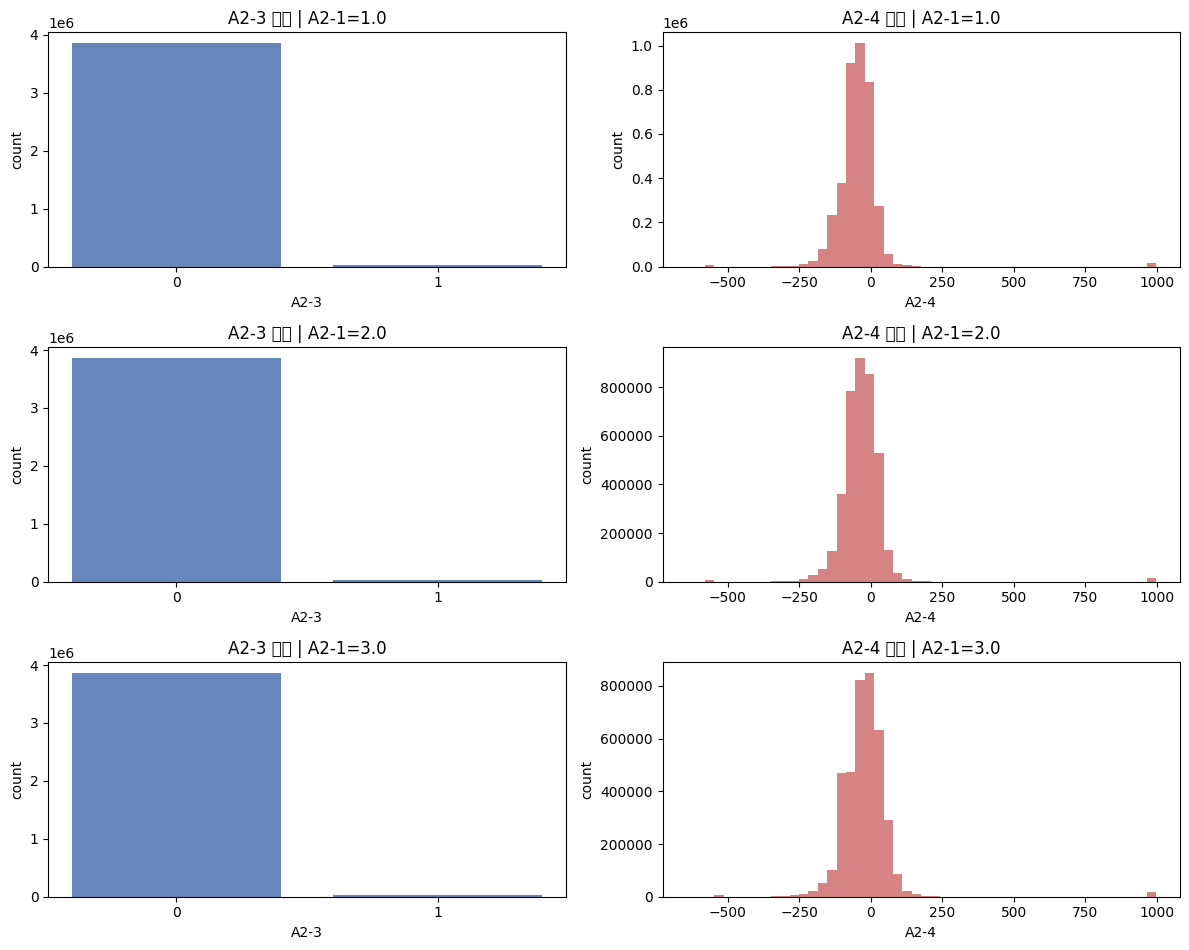


[A] 요약 테이블


A2-3,0,1
A2-1,,
1.0,3852119,31321
2.0,3853666,29774
3.0,3854105,29335


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
A2-1,,,,,,,,,,,,
1.0,3883440.0,-44.539,92.382,-645.0,-204.0,-136.0,-80.0,-45.0,-14.0,29.0,82.0,999.0
2.0,3883440.0,-31.841,91.052,-645.0,-199.0,-127.0,-69.0,-33.0,0.0,50.0,104.0,999.0
3.0,3883440.0,-22.662,93.246,-645.0,-201.0,-122.0,-68.0,-22.0,16.0,66.0,125.0,999.0


In [ ]:
# A2 검사: A2-1 값에 따른 A2-3/A2-4 분포 (시퀀스 매칭)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A가 없다면 로드
if 'A' not in globals():
    PROJECT_ROOT = os.path.abspath(os.getcwd())
    DATA_CANDIDATES = [
        os.path.join(PROJECT_ROOT, 'project', 'data'),
        os.path.join(PROJECT_ROOT, 'data'),
        PROJECT_ROOT,
    ]
    def _find_file(filename: str):
        for base in DATA_CANDIDATES:
            p0 = os.path.join(base, filename)
            if os.path.isfile(p0):
                return p0
            for sub in ('train','test'):
                p1 = os.path.join(base, sub, filename)
                if os.path.isfile(p1):
                    return p1
        return None
    _A_PATH = _find_file('A.csv')
    if _A_PATH is None:
        raise FileNotFoundError('A.csv 경로를 찾을 수 없습니다. project/data/ 에 파일을 넣어 주세요.')
    A = pd.read_csv(_A_PATH)

col_a21 = 'A2-1'
col_a23 = 'A2-3'
col_a24 = 'A2-4'

missing = [c for c in [col_a21, col_a23, col_a24] if c not in A.columns]
if missing:
    print('A 데이터에 필요한 컬럼이 없습니다:', missing)
else:
    if 'parse_seq' not in globals():
        def parse_seq(val):
            if pd.isna(val):
                return []
            if isinstance(val, (list, tuple, np.ndarray)):
                return [pd.to_numeric(x, errors='coerce') for x in val]
            s = str(val)
            parts = [p.strip() for p in s.split(',')]
            out = []
            for p in parts:
                if p == '':
                    out.append(np.nan)
                else:
                    try:
                        out.append(float(p))
                    except Exception:
                        out.append(np.nan)
            return out

    # 시퀀스 매칭 후 long 형태로 변환
    recs = []
    rows_considered = 0
    for _, row in A[[col_a21, col_a23, col_a24]].iterrows():
        s1 = parse_seq(row[col_a21])
        s3 = parse_seq(row[col_a23])
        s4 = parse_seq(row[col_a24])
        m = min(len(s1), len(s3), len(s4))
        if m == 0:
            continue
        rows_considered += 1
        for i in range(m):
            v1 = s1[i]
            v3 = s3[i]
            v4 = s4[i]
            if pd.notna(v1) and pd.notna(v3) and pd.notna(v4):
                recs.append((v1, v3, v4))

    if not recs:
        print('유효한 시퀀스 매칭 결과가 없습니다.')
    else:
        long_df = pd.DataFrame(recs, columns=[col_a21, col_a23, col_a24])
        # 안전상 숫자화
        long_df[col_a21] = pd.to_numeric(long_df[col_a21], errors='coerce')
        long_df[col_a23] = pd.to_numeric(long_df[col_a23], errors='coerce')
        long_df[col_a24] = pd.to_numeric(long_df[col_a24], errors='coerce')
        long_df = long_df.replace([np.inf, -np.inf], np.nan).dropna()

        print('[A] 시퀀스 매칭 결과')
        print(' - 시퀀스 고려 행 수:', rows_considered)
        print(' - 포지션 총 개수:', len(long_df))
        display(long_df.head(5))

        # 상위 A2-1 카테고리 선택 (빈도 기준)
        top_cats = (long_df[col_a21].value_counts().sort_values(ascending=False).head(6).index.tolist())
        print('대상 A2-1 카테고리(상위):', top_cats)

        # A2-3은 코드/이진으로 가정: 막대 분포, A2-4는 연속 분포: 히스토그램
        # 공통 히스토그램 범위
        vmin, vmax = long_df[col_a24].min(), long_df[col_a24].max()
        bins = 50

        n = len(top_cats)
        if n == 0:
            print('표시할 카테고리가 없습니다.')
        else:
            fig, axes = plt.subplots(n, 2, figsize=(12, 3.2*n))
            if n == 1:
                axes = np.array([axes])
            for r, cat in enumerate(top_cats):
                sub = long_df[long_df[col_a21] == cat]
                # A2-3 분포 (막대)
                vc = sub[col_a23].round().astype(int).value_counts().sort_index()
                axes[r,0].bar(vc.index.astype(str), vc.values, color='#4C72B0', alpha=0.85)
                axes[r,0].set_title(f'{col_a23} 분포 | {col_a21}={cat}')
                axes[r,0].set_xlabel(col_a23)
                axes[r,0].set_ylabel('count')

                # A2-4 분포 (히스토그램)
                axes[r,1].hist(sub[col_a24], bins=bins, range=(vmin, vmax), color='#C44E52', alpha=0.70)
                axes[r,1].set_title(f'{col_a24} 분포 | {col_a21}={cat}')
                axes[r,1].set_xlabel(col_a24)
                axes[r,1].set_ylabel('count')
            plt.tight_layout()
            plt.show()

        # 요약 테이블: A2-1별 A2-3 분포(상위), A2-4 통계
        print('\n[A] 요약 테이블')
        # A2-3 분포 표 (상위 카테고리만)
        dist_rows = []
        for cat in top_cats:
            sub = long_df[long_df[col_a21] == cat]
            vc = sub[col_a23].round().astype(int).value_counts().sort_index()
            for k, v in vc.items():
                dist_rows.append({col_a21: cat, col_a23: int(k), 'count': int(v)})
        if dist_rows:
            dist_df = pd.DataFrame(dist_rows)
            display(dist_df.pivot_table(index=col_a21, columns=col_a23, values='count', aggfunc='sum', fill_value=0))

        # A2-4 통계 표
        stats = (long_df.groupby(col_a21)[col_a24]
                 .describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])
                 .round(3))
        display(stats.loc[top_cats] if len(stats) else stats)


[A] 시퀀스 매칭 결과
 - 시퀀스 고려 행 수: 647240
 - 포지션 총 개수: 11650320


,A2-1,A2-2,A2-3,A2-4
0,1.0,1.0,0.0,16.0
1,1.0,3.0,0.0,82.0
2,2.0,1.0,0.0,-33.0
3,3.0,1.0,0.0,-5.0
4,1.0,1.0,0.0,29.0



[A] 조합 카운트 (rows by A2-1, cols by A2-2)


A2-2,1.0,2.0,3.0
A2-1,,,
1.0,1294480,1294480,1294480
2.0,1294480,1294480,1294480
3.0,1294480,1294480,1294480


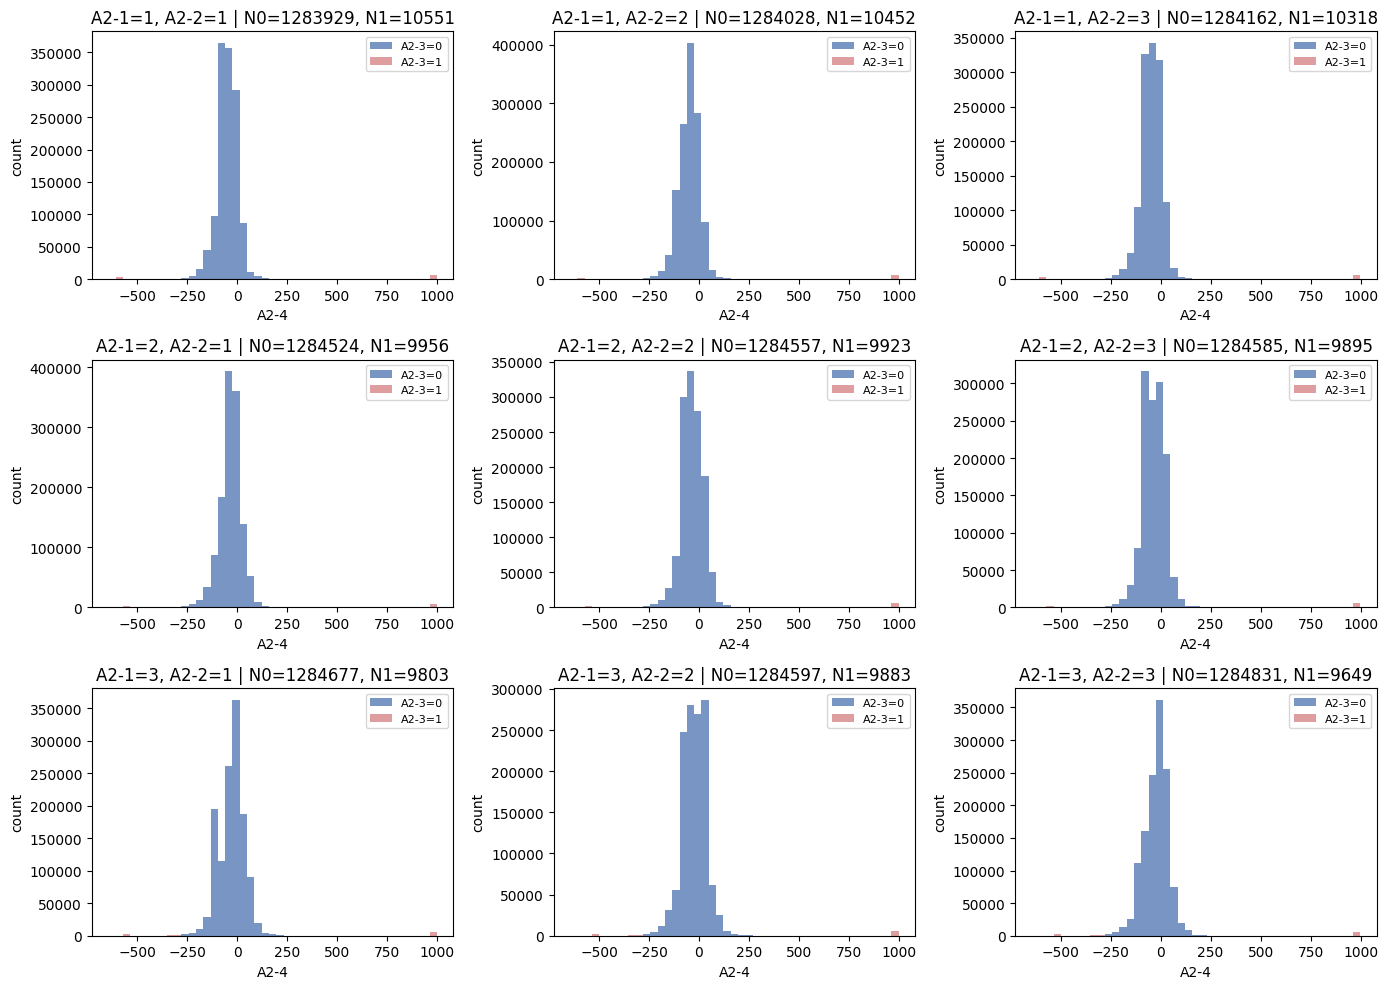


[A] 조합별 A2-4 통계


A2-1  A2-2        
1.0   1.0   count     1.294480e+06
            mean     -4.432869e+01
            median   -5.000000e+01
            std       9.257769e+01
            p25      -8.000000e+01
                          ...     
3.0   3.0   median   -2.300000e+01
            std       9.272272e+01
            p25      -5.400000e+01
            p50      -2.300000e+01
            p75       2.300000e+01
Name: A2-4, Length: 63, dtype: float64

/var/folders/8g/x3kqv_gx5hdb25l1fv6qd8jw0000gn/T/ipykernel_54034/4256212049.py:166: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels, vert=False, patch_artist=True,


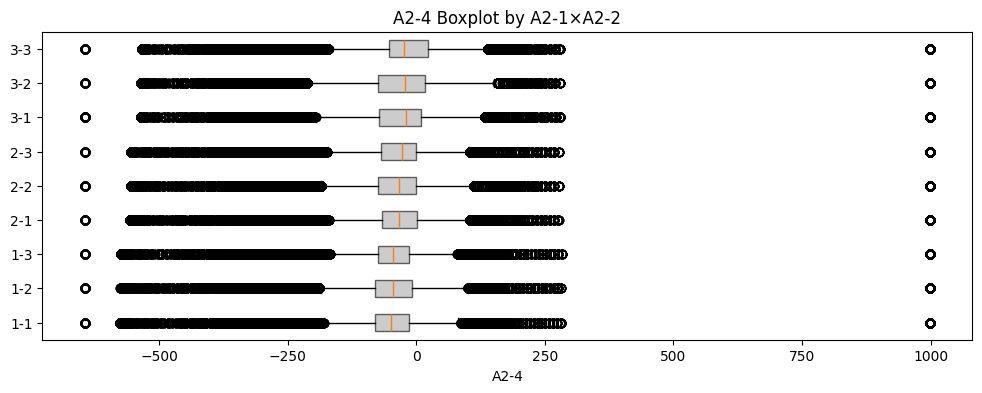

In [ ]:
# A2 검사: A2-1 × A2-2 (0/1/2 조합)별 A2-4 분포 분석 (시퀀스 매칭)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A가 없다면 로드
if 'A' not in globals():
    PROJECT_ROOT = os.path.abspath(os.getcwd())
    DATA_CANDIDATES = [
        os.path.join(PROJECT_ROOT, 'project', 'data'),
        os.path.join(PROJECT_ROOT, 'data'),
        PROJECT_ROOT,
    ]
    def _find_file(filename: str):
        for base in DATA_CANDIDATES:
            p0 = os.path.join(base, filename)
            if os.path.isfile(p0):
                return p0
            for sub in ('train','test'):
                p1 = os.path.join(base, sub, filename)
                if os.path.isfile(p1):
                    return p1
        return None
    _A_PATH = _find_file('A.csv')
    if _A_PATH is None:
        raise FileNotFoundError('A.csv 경로를 찾을 수 없습니다. project/data/ 에 파일을 넣어 주세요.')
    A = pd.read_csv(_A_PATH)

col_a21 = 'A2-1'
col_a22 = 'A2-2'
col_a23 = 'A2-3'
col_a24 = 'A2-4'

missing = [c for c in [col_a21, col_a22, col_a23, col_a24] if c not in A.columns]
if missing:
    print('A 데이터에 필요한 컬럼이 없습니다:', missing)
else:
    # 유틸: 시퀀스 파싱
    if 'parse_seq' not in globals():
        def parse_seq(val):
            if pd.isna(val):
                return []
            if isinstance(val, (list, tuple, np.ndarray)):
                return [pd.to_numeric(x, errors='coerce') for x in val]
            s = str(val)
            parts = [p.strip() for p in s.split(',')]
            out = []
            for p in parts:
                if p == '':
                    out.append(np.nan)
                else:
                    try:
                        out.append(float(p))
                    except Exception:
                        out.append(np.nan)
            return out

    # 매칭 → long 데이터 구성 (A2-1, A2-2, A2-3, A2-4)
    recs = []
    rows_considered = 0
    for _, row in A[[col_a21, col_a22, col_a23, col_a24]].iterrows():
        s1 = parse_seq(row[col_a21])
        s2 = parse_seq(row[col_a22])
        s3 = parse_seq(row[col_a23])
        s4 = parse_seq(row[col_a24])
        m = min(len(s1), len(s2), len(s3), len(s4))
        if m == 0:
            continue
        rows_considered += 1
        for i in range(m):
            v1 = s1[i]
            v2 = s2[i]
            v3 = s3[i]
            v4 = s4[i]
            if pd.notna(v1) and pd.notna(v2) and pd.notna(v3) and pd.notna(v4):
                recs.append((v1, v2, v3, v4))

    if not recs:
        print('유효한 시퀀스 매칭 결과가 없습니다.')
    else:
        long_df = pd.DataFrame(recs, columns=[col_a21, col_a22, col_a23, col_a24])
        # 숫자화 및 정리
        for c in [col_a21, col_a22, col_a23, col_a24]:
            long_df[c] = pd.to_numeric(long_df[c], errors='coerce')
        long_df = long_df.replace([np.inf, -np.inf], np.nan).dropna()

        # A2-1/A2-2는 1/2/3으로 제한
        long_df = long_df[long_df[col_a21].isin([1,2,3]) & long_df[col_a22].isin([1,2,3])]

        print('[A] 시퀀스 매칭 결과')
        print(' - 시퀀스 고려 행 수:', rows_considered)
        print(' - 포지션 총 개수:', len(long_df))
        display(long_df.head(5))

        # 조합 카운트 테이블
        combo_counts = (long_df
                        .groupby([col_a21, col_a22])
                        .size()
                        .unstack(col_a22)
                        .fillna(0)
                        .astype(int)
                       )
        print('\n[A] 조합 카운트 (rows by A2-1, cols by A2-2)')
        display(combo_counts)

        # 공통 히스토그램 범위
        vmin, vmax = long_df[col_a24].min(), long_df[col_a24].max()
        bins = 45

        # 3×3 조합별 히스토그램 (A2-3==0 vs 1 색상 오버레이)
        fig, axes = plt.subplots(3, 3, figsize=(14, 10))
        for idx_i, i in enumerate([1,2,3]):
            for idx_j, j in enumerate([1,2,3]):
                ax = axes[idx_i, idx_j]
                mask = (long_df[col_a21] == i) & (long_df[col_a22] == j)
                sub0 = long_df[mask & (long_df[col_a23] == 0)][col_a24]
                sub1 = long_df[mask & (long_df[col_a23] == 1)][col_a24]
                if sub0.empty and sub1.empty:
                    ax.text(0.5, 0.5, 'no data', ha='center', va='center')
                    ax.set_axis_off()
                    continue
                if not sub0.empty:
                    ax.hist(sub0, bins=bins, range=(vmin, vmax), color='#4C72B0', alpha=0.75, label=f'{col_a23}=0')
                if not sub1.empty:
                    ax.hist(sub1, bins=bins, range=(vmin, vmax), color='#C44E52', alpha=0.55, label=f'{col_a23}=1')
                n0 = len(sub0)
                n1 = len(sub1)
                ax.set_title(f'{col_a21}={i}, {col_a22}={j} | N0={n0}, N1={n1}')
                ax.set_xlabel(col_a24)
                ax.set_ylabel('count')
                ax.legend(fontsize=8)
        plt.tight_layout()
        plt.show()

        # 조합별 통계 테이블 (count, mean, median, std, p25/p50/p75)
        def stats_series(x: pd.Series) -> pd.Series:
            return pd.Series({
                'count': int(x.shape[0]),
                'mean': float(np.nanmean(x)),
                'median': float(np.nanmedian(x)),
                'std': float(np.nanstd(x, ddof=1)) if x.shape[0] > 1 else np.nan,
                'p25': float(np.nanpercentile(x, 25)),
                'p50': float(np.nanpercentile(x, 50)),
                'p75': float(np.nanpercentile(x, 75)),
            })

        stats_tbl = (long_df
                     .groupby([col_a21, col_a22])[col_a24]
                     .apply(stats_series)
                    )
        print('\n[A] 조합별 A2-4 통계')
        display(stats_tbl)

        # 박스플롯: 9개 조합 나란히 (레이블: i-j)
        data = []
        labels = []
        for i in [1,2,3]:
            for j in [1,2,3]:
                sub = long_df[(long_df[col_a21] == i) & (long_df[col_a22] == j)][col_a24]
                if not sub.empty:
                    data.append(sub.values)
                    labels.append(f'{i}-{j}')
        if data:
            fig, ax = plt.subplots(figsize=(12, 4))
            ax.boxplot(data, labels=labels, vert=False, patch_artist=True,
                       boxprops=dict(facecolor='#AAAAAA', alpha=0.6))
            ax.set_title('A2-4 Boxplot by A2-1×A2-2')
            ax.set_xlabel(col_a24)
            plt.show()
